In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import plotly.express as px
#theres a spotify package
#makes a correlation matrix
import plotly.figure_factory as ff # HW 4
#go.Figure makes a pair plot
import plotly.graph_objs as go # HW4
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Load The Data

* found this dataset on [Kaggle](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)


In [2]:
mxmh_survey_results = pd.read_csv("mxmh_survey_results.csv")
mxmh_survey_results 

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

The frequency columns are categorical. We'll have to recode those to be numeric so we can run correlations.

## What are our features?

In [3]:
len(mxmh_survey_results.columns)

33

We have 33 features

In [4]:
mxmh_survey_results.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

* 16 unique genres considered
* BMP = Beats per minute of favorite genre
* All feature descriptions are on the kaggle site 

Data Types:

* Timestamp: Interval ##########################################################################################double check
* Age: Ratio
* Primary streaming service: Nominal
* Hours per day: Ratio
* While working: Binary (Yes, No)
* Instrumentalist: Binary (Yes, No)
* Composer: Binary (Yes, No)
* Fav genre: Nominal
* Exploratory: Binary (Yes, No)
* Foreign languages: Binary (Yes, No)
* BPM: Ratio ############################################################################################## double check, float so continuous?
* Frequency [Classical]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Country]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [EDM]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Folk]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Gospel]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Hip hop]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Jazz]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [K pop]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Latin]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Lofi]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Metal]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Pop]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [R&B]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Rap]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Rock]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Video game music]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Anxiety: Ordinal (Likert scale, 1-10)
* Depression: Ordinal (Likert scale, 1-10)
* Insomnia: Ordinal (Likert scale, 1-10)
* OCD: Ordinal (Likert scale, 1-10)
* Music effects: Ordinal (No effect, Improve, Worsen)
* Permissions: Binary (Yes, No)

# Investigate The Data

## Any Missing Vals?

In [5]:
mxmh_survey_results.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

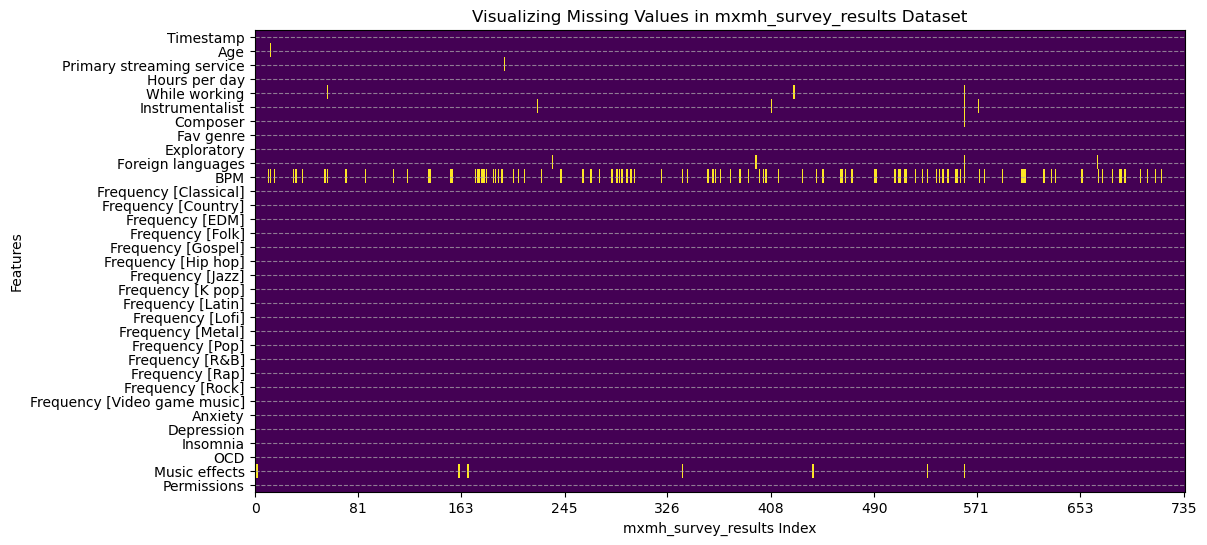

In [6]:
#make a heatmap of the missing data

##################Using code given in ICA 2 

#import numpy and nickname it np
import numpy as np 

#import matplotlib as plt
import matplotlib.pyplot as plt

#make a smaller dataset of just four colunns from planets 
#global_playlists_subset = global_playlists[["number", "orbital_period", "mass", "distance"]]
#I dont need just numerical right? Can I include my categoricals?

# create a boolean mask: True for NaN, False for finite values
nan_mask = mxmh_survey_results.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot 12 x 6 
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
# interpoltation is finding the best fit of data 
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

# label the x axis Planet Index
plt.xlabel('mxmh_survey_results Index')
# label the y axis Features
plt.ylabel('Features')
# title the whole plot Visualizing Missing Values in a Dataset 
plt.title('Visualizing Missing Values in mxmh_survey_results Dataset')

# y-axis tick labels to feature names
# make the y-axis go from 0 to 4 and label them the names of the subset columns
plt.yticks(range(len(mxmh_survey_results.columns)), mxmh_survey_results.columns)

# x-axis ticks
#
num_participants = nan_array.shape[0]
plt.xticks(np.linspace(0, num_participants-1, min(10, num_participants)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


## Plans To Handle Missing Data

* Age: delete if I explore that feature but keep them in the general analysis so I can use their other observed vals. Might explore that feature to see if there are differences between age groups.
* BPM: Ignore. Will not include in my analysis since it's self-reported.
* Primary streaming service: No plans to explore this one. Delete if I explore that feature but keep them in the general analysis so I can use their other observed vals.
* While Working: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals. I do plan to explore this later on.
* Music Effects: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals. I do plan to explore later.
* Instrumentalist + Compser: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals. I do plan to explore this later on.
* Foreign Lang: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals.

## Distribution of our Original Features

### Age

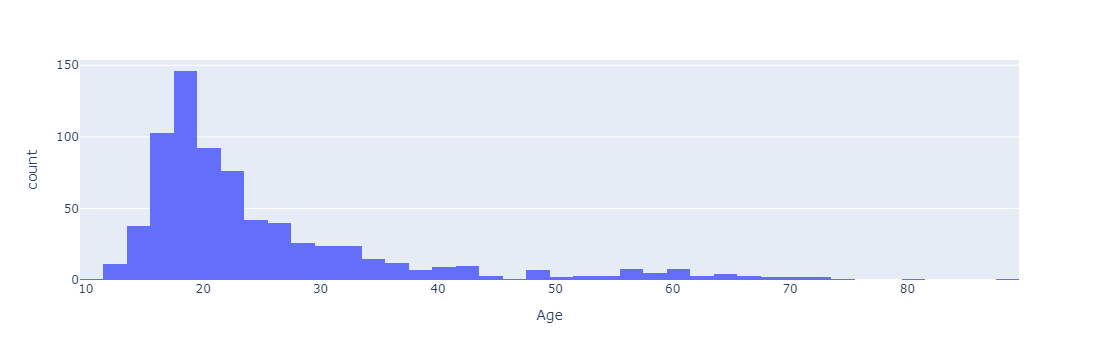

In [7]:
#age distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x="Age")
fig.show()

### Primary Streaming Service

In [8]:
#what are our platforms?
mxmh_survey_results["Primary streaming service"].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

In [9]:
#what values should I pick?
print(sum(mxmh_survey_results["Primary streaming service"] == "Spotify"))
print(sum(mxmh_survey_results["Primary streaming service"] == "Pandora"))
print(sum(mxmh_survey_results["Primary streaming service"] == "YouTube Music"))
print(sum(mxmh_survey_results["Primary streaming service"] == "I do not use a streaming service."))
print(sum(mxmh_survey_results["Primary streaming service"] == "Apple Music"))
print(sum(mxmh_survey_results["Primary streaming service"] == "'Other streaming service"))


458
11
94
71
51
0


Text(0, 0.5, 'Streaming Service')

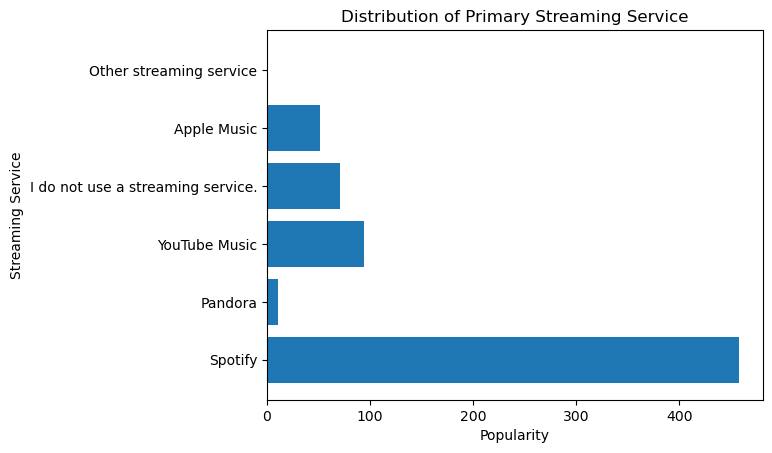

In [10]:
#primary streaming service (categorical horizontal barplot)
#HW 2

#create a variable that stores our platforms
platforms = ['Spotify', 'Pandora', 'YouTube Music', 'I do not use a streaming service.', 'Apple Music',  'Other streaming service']
popularity = [458, 11, 94, 71, 51, 0]
plt.barh(platforms, popularity)
#set the title 
plt.title('Distribution of Primary Streaming Service')
#set the x axis title
plt.xlabel('Popularity')
#set the y axis title 
plt.ylabel('Streaming Service')


In [11]:
# #primary streaming service distribution

# #what are our platforms?
# mxmh_survey_results["Primary streaming service"].unique()

# #create the histogram
# plt.hist(mxmh_survey_results["Primary streaming service"], bins=6, edgecolor='black')

# #set the title of the plot
# plt.title('Distribution of Platform Use')

# #set the x-axis title
# plt.xlabel('Platform')
# plt.xticks(rotation=45)

### Fav genre

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

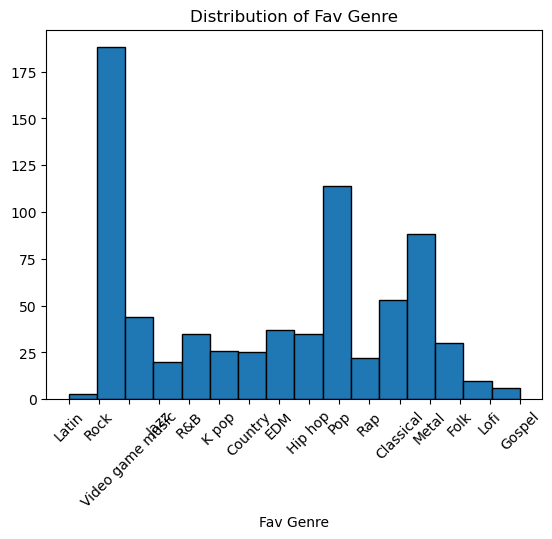

In [12]:
#fav genre distribution


#create the histogram
plt.hist(mxmh_survey_results["Fav genre"], bins=16, edgecolor='black')

#set the title of the plot
plt.title('Distribution of Fav Genre')

#set the x-axis title
plt.xlabel('Fav Genre')
plt.xticks(rotation=45)

### Mental Health Scores

#### Anxiety

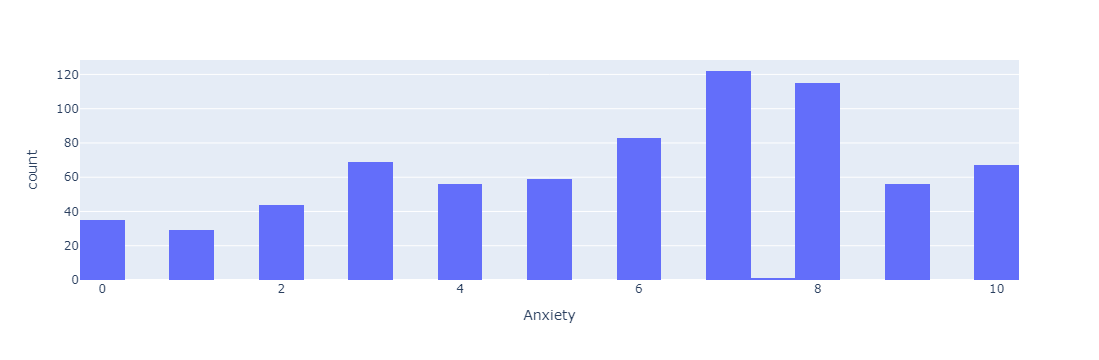

In [13]:
#anxiety distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x="Anxiety")
fig.show()

#### Depression

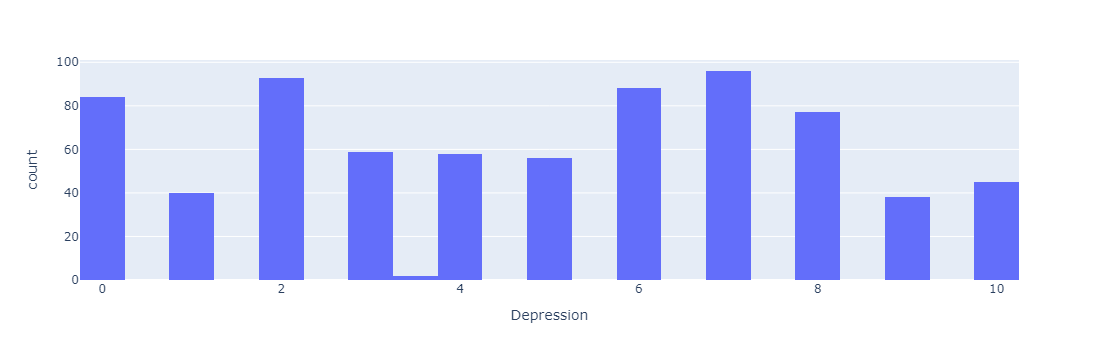

In [14]:
#depression distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x="Depression")
fig.show()

#### Insomnia

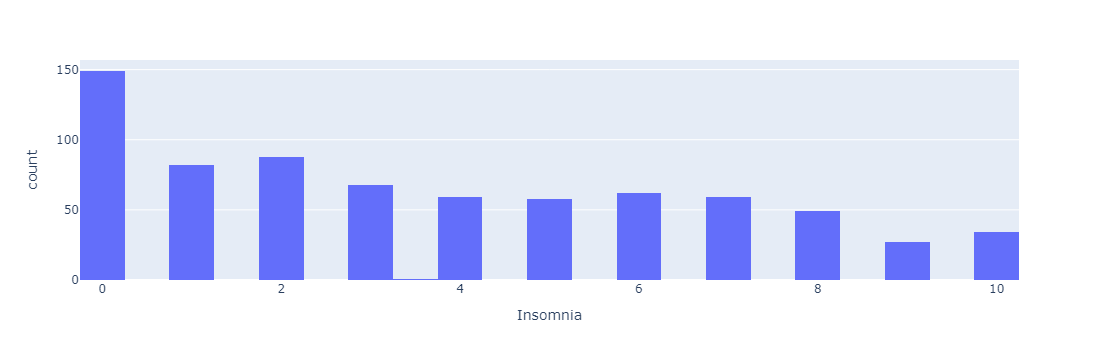

In [15]:
#Insomnia distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x="Insomnia")
fig.show()

#### OCD

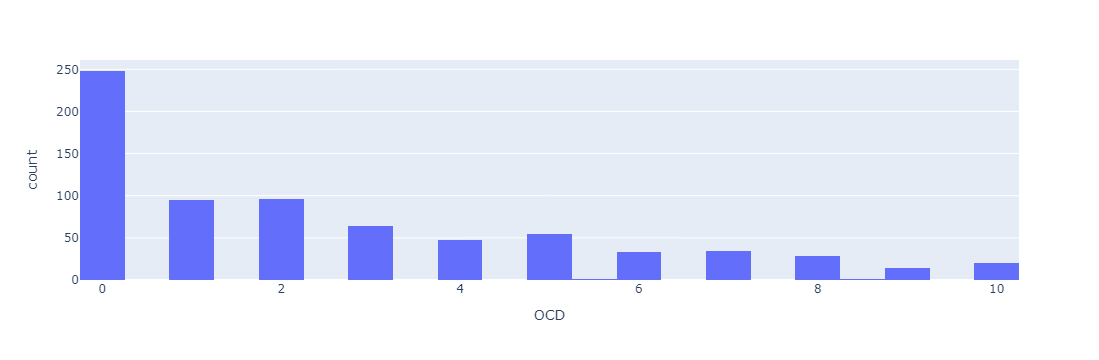

In [16]:
#OCD distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x="OCD")
fig.show()

### Frequency [Genre]

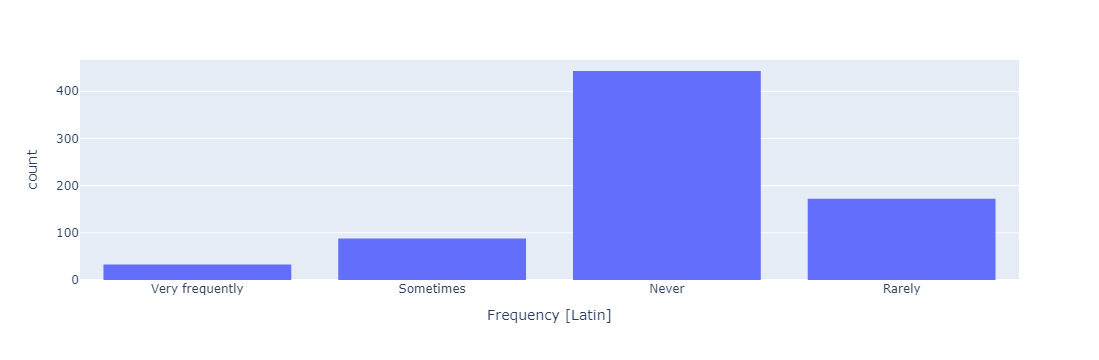

In [17]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Latin]'))
fig.show()

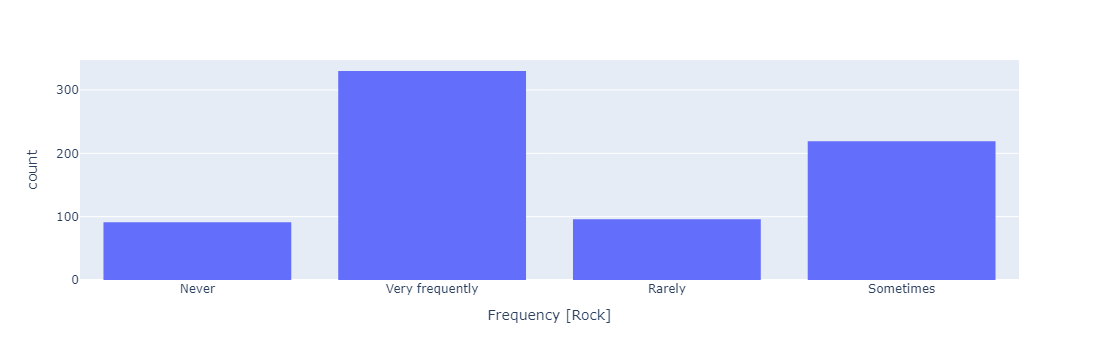

In [18]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Rock]'))
fig.show()

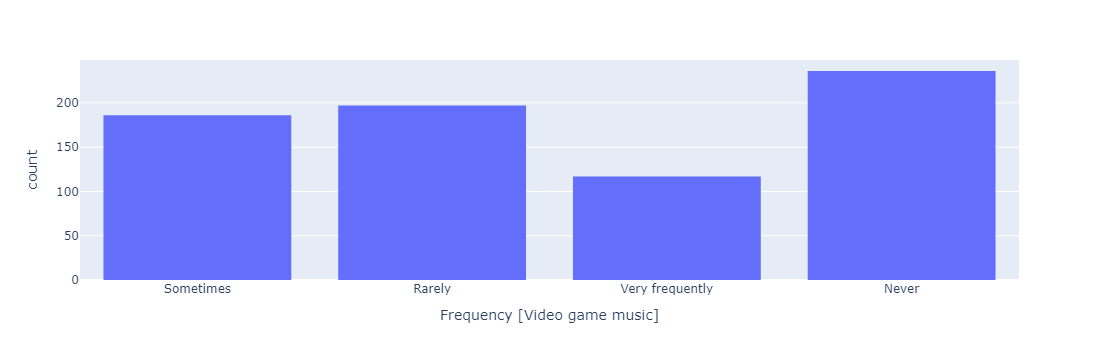

In [19]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Video game music]'))
fig.show()

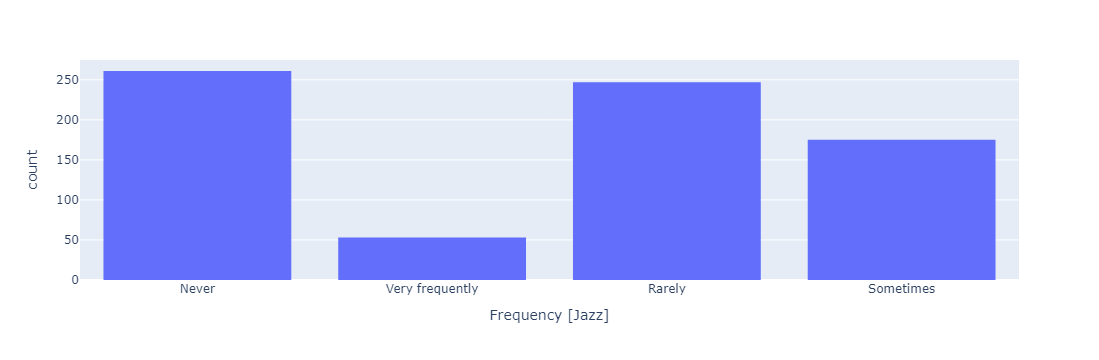

In [20]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Jazz]'))
fig.show()

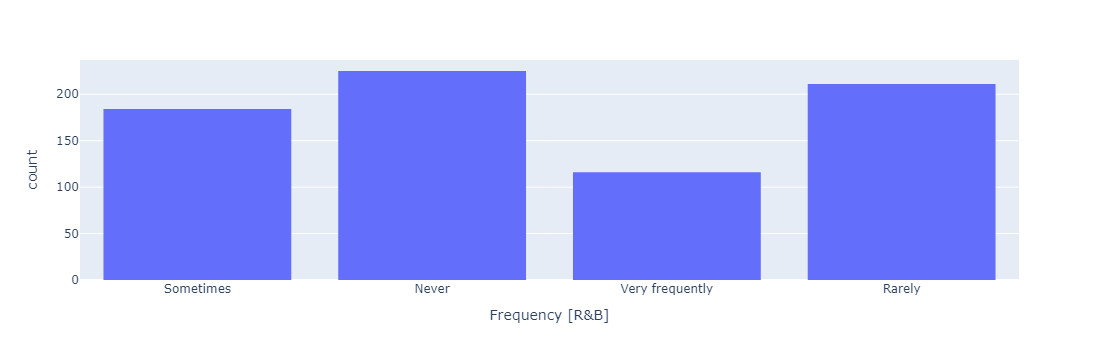

In [21]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [R&B]'))
fig.show()

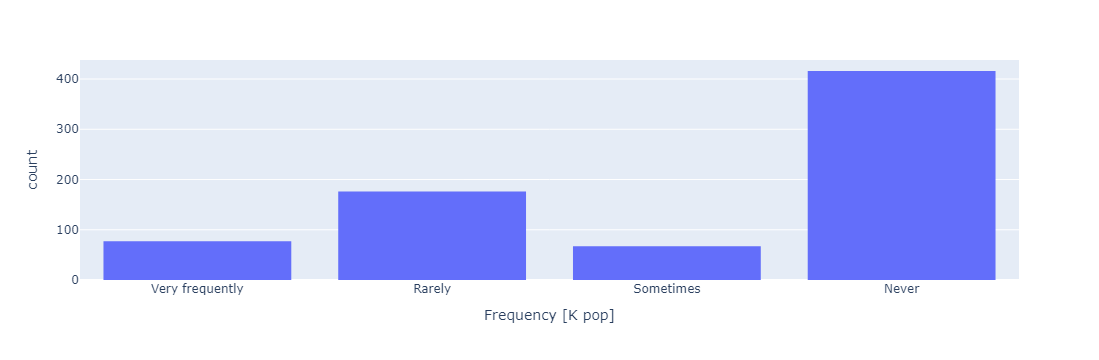

In [22]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [K pop]'))
fig.show()

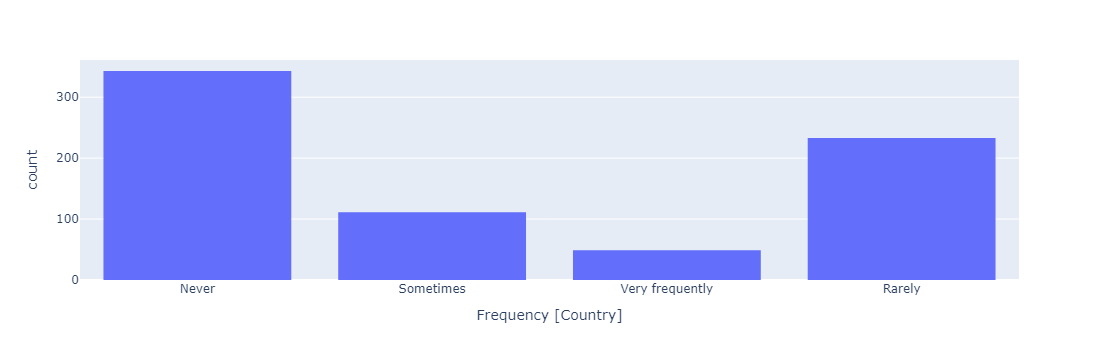

In [23]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Country]'))
fig.show()

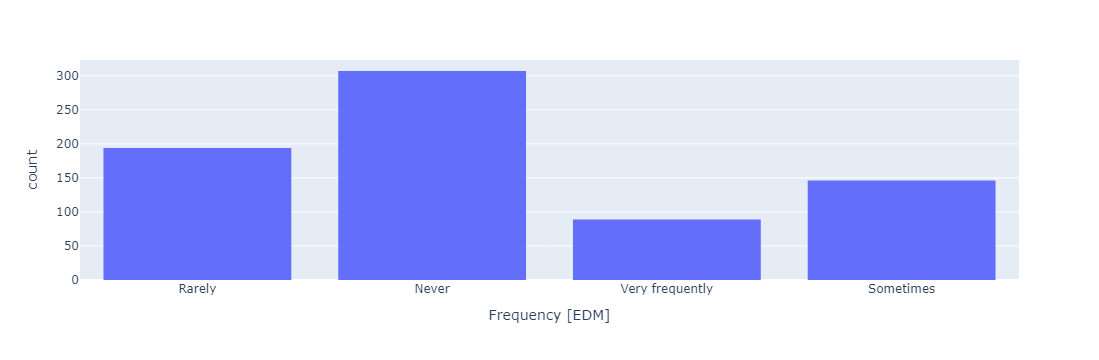

In [24]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [EDM]'))
fig.show()

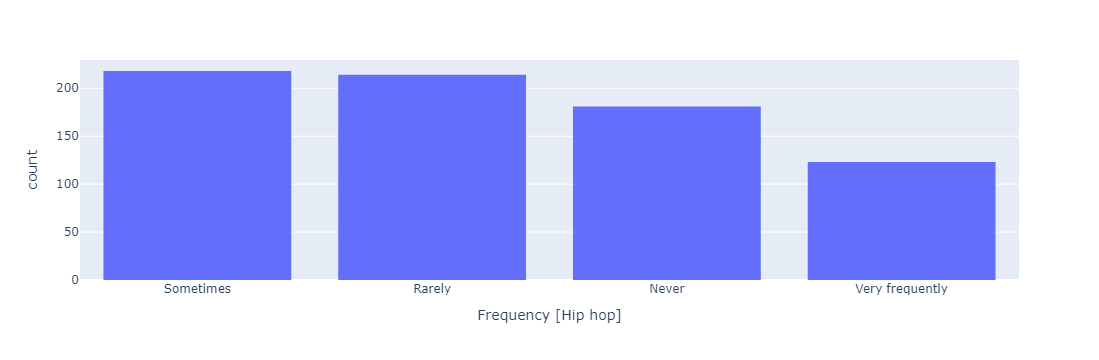

In [25]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Hip hop]'))
fig.show()

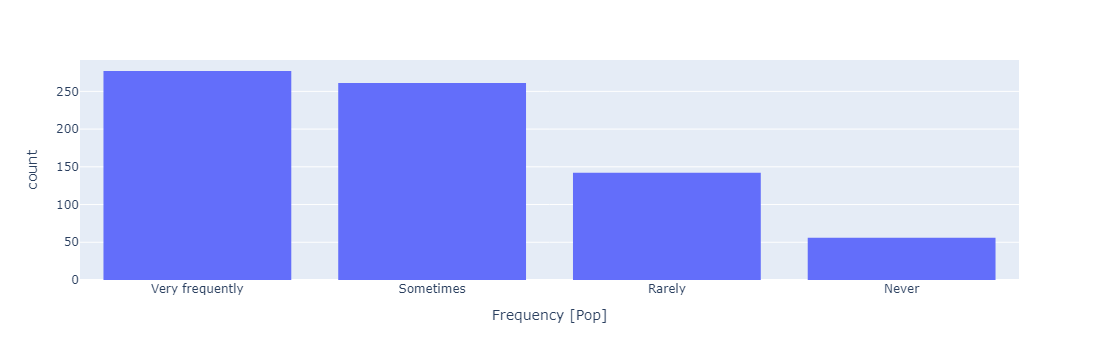

In [26]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Pop]'))
fig.show()

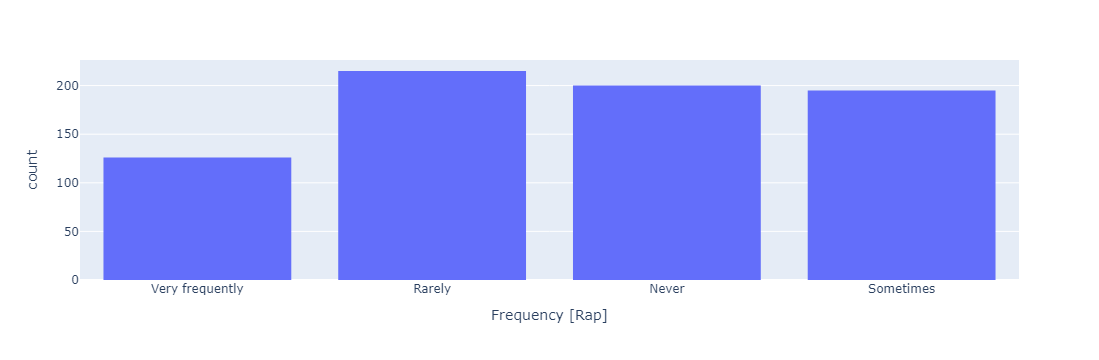

In [27]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Rap]'))
fig.show()

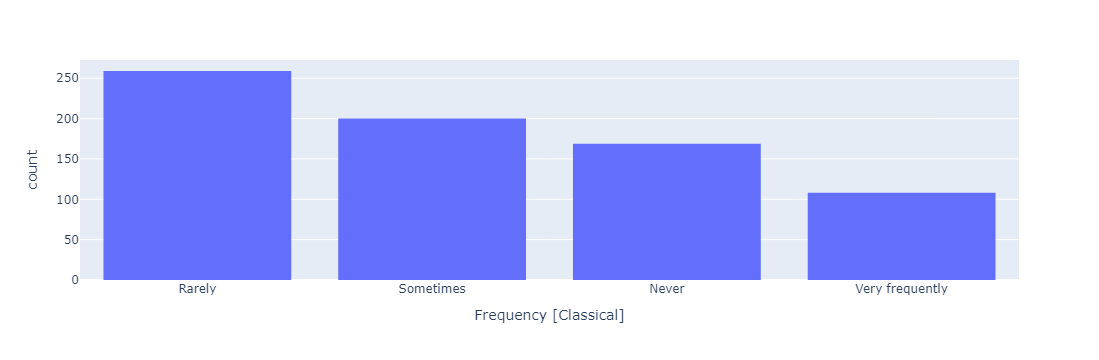

In [28]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Classical]'))
fig.show()

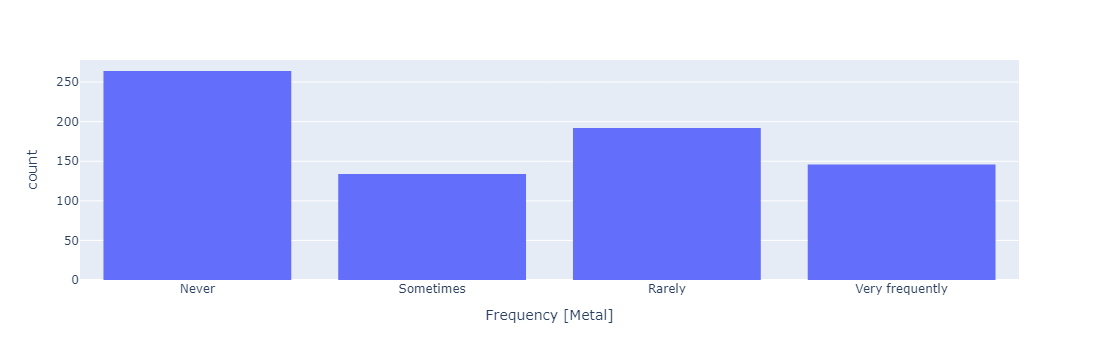

In [29]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Metal]'))
fig.show()

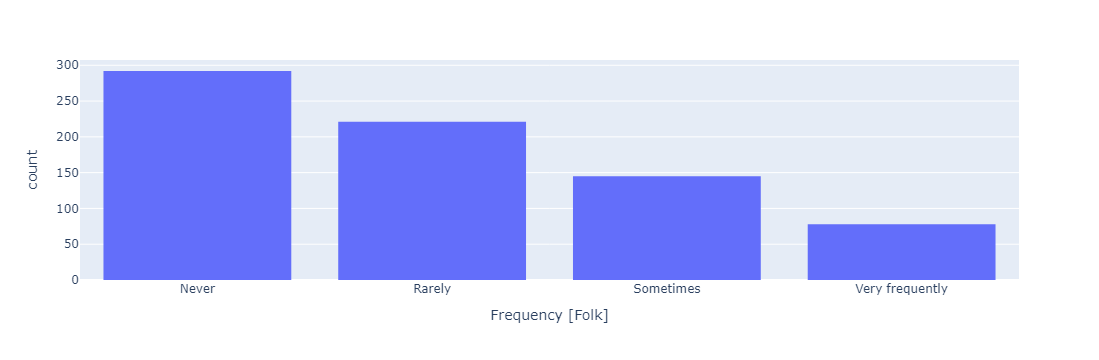

In [30]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Folk]'))
fig.show()

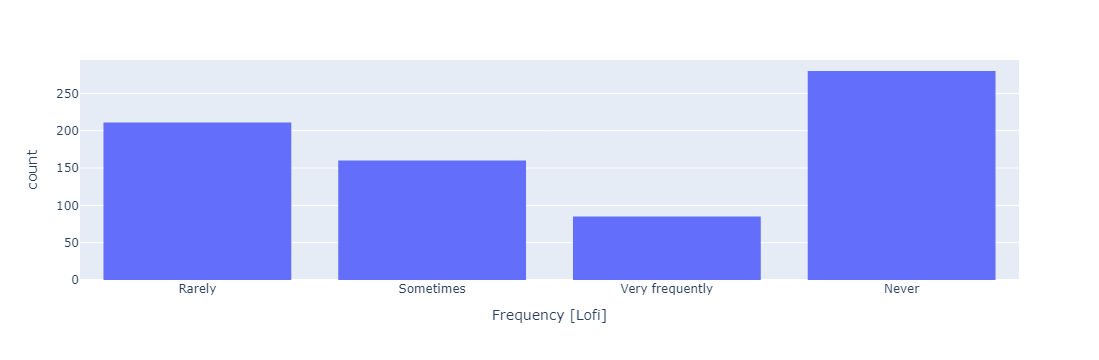

In [31]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Lofi]'))
fig.show()

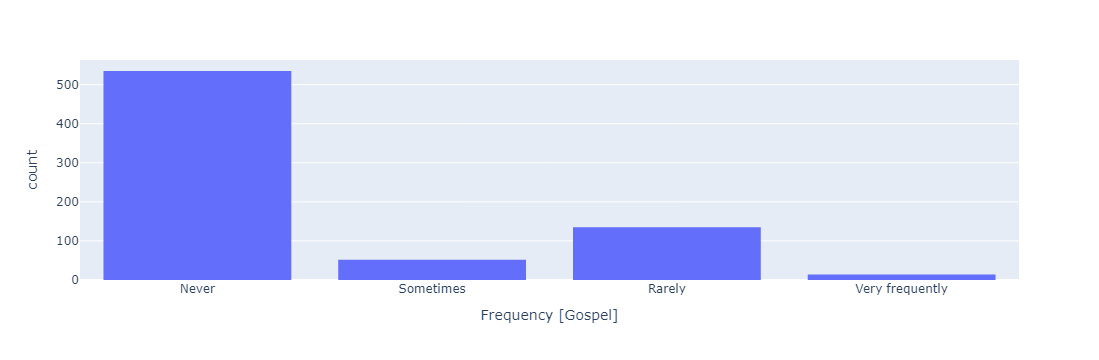

In [32]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Frequency [Gospel]'))
fig.show()

In [33]:
## give me the mode of these frequencies 

filtered_dataset = mxmh_survey_results[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 
     'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 
     'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 
     'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
     'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
     'Frequency [Video game music]']]


for col in filtered_dataset:
    print(filtered_dataset[col].mode())
    

0    Rarely
Name: Frequency [Classical], dtype: object
0    Never
Name: Frequency [Country], dtype: object
0    Never
Name: Frequency [EDM], dtype: object
0    Never
Name: Frequency [Folk], dtype: object
0    Never
Name: Frequency [Gospel], dtype: object
0    Sometimes
Name: Frequency [Hip hop], dtype: object
0    Never
Name: Frequency [Jazz], dtype: object
0    Never
Name: Frequency [K pop], dtype: object
0    Never
Name: Frequency [Latin], dtype: object
0    Never
Name: Frequency [Lofi], dtype: object
0    Never
Name: Frequency [Metal], dtype: object
0    Very frequently
Name: Frequency [Pop], dtype: object
0    Never
Name: Frequency [R&B], dtype: object
0    Rarely
Name: Frequency [Rap], dtype: object
0    Very frequently
Name: Frequency [Rock], dtype: object
0    Never
Name: Frequency [Video game music], dtype: object


In [34]:
#is there a way to see if there are maybe 50 ppl who listen to all genres?

#I think I will keep 25 or 50 of each level. 

#practice 


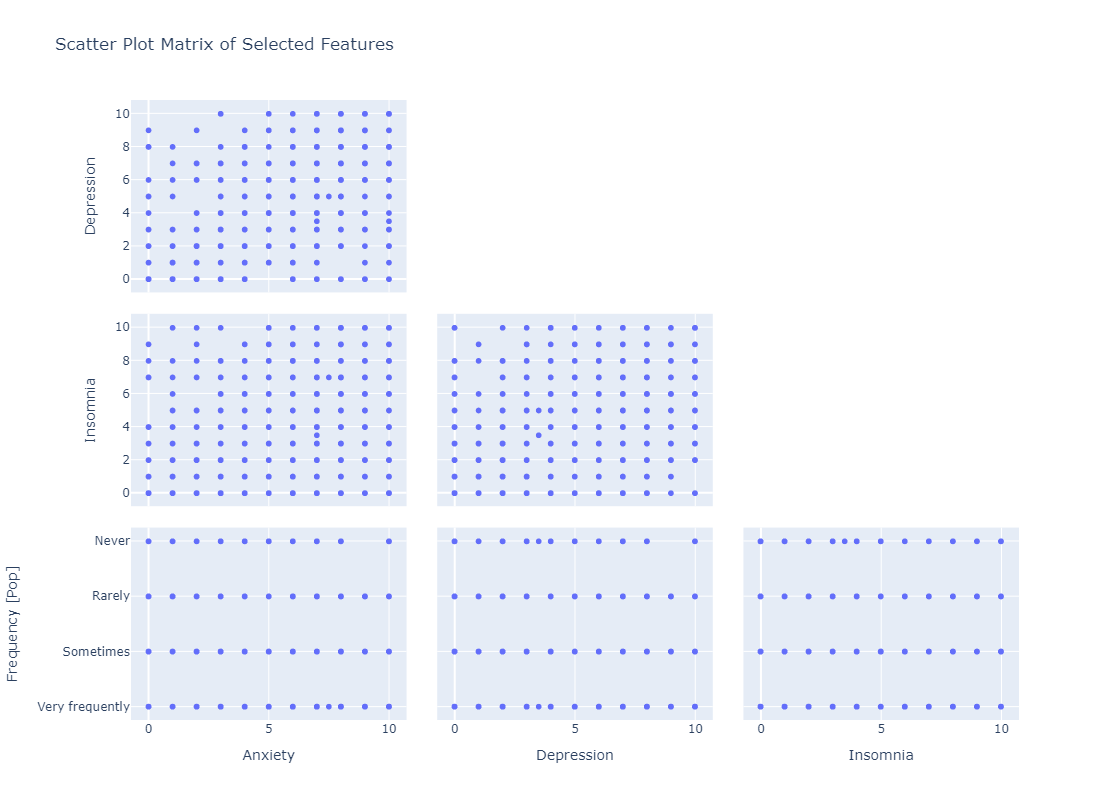

In [35]:
#make a pair plot of all numeric features so we can see relationships between them all

#make a list of selected features
numeric_features = ['Anxiety', 'Depression', 'Insomnia', 'Frequency [Pop]']  

#make the plot
fig_splom = go.Figure(data=go.Splom(
    dimensions=[dict(label=col, values=mxmh_survey_results[col]) for col in numeric_features],
    showupperhalf=False,  # Only show the lower half of the matrix
    diagonal_visible=False  # Hide diagonal subplots
))

fig_splom.update_layout(
    title="Scatter Plot Matrix of Selected Features",
    dragmode='select',
    width=800,
    height=800
)

fig_splom.show()

### Hours Spent Per Day

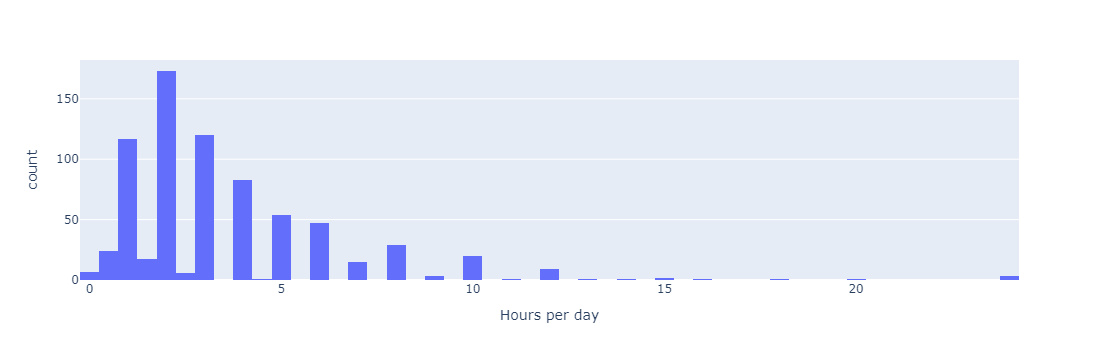

In [36]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Hours per day'))
fig.show()

### Experts vs Non-experts

In [37]:
# #expert_dataset = mxmh_survey_results[(mxmh_survey_results["Composer"] == "Yes") & (mxmh_survey_results["Instrumentalist"] == "Yes")]
# #nonexpert_dataset  = mxmh_survey_results[(mxmh_survey_results["Composer"] == "No") & (mxmh_survey_results["Instrumentalist"] == "No")]

# sns.histplot(mxmh_survey_results["Composer"], color='red', stacked label='Composer')
# sns.histplot(mxmh_survey_results["Instrumentalist"], color='blue', label='Instrumentalist', multiple='stack')

#H# 5
##########can color it based on another variable
#sns.displot(data=mxmh_survey_results, x="Composer", kde=True, bins = 2, hue = "species", multiple = "stack", rug = True
# sns.displot(data=mxmh_survey_results, x="Composer", kde=True, bins = 2, multiple = "stack", rug = True)
# sns.displot(data=mxmh_survey_results, x="Instrumentalist", kde=True, bins = 2, multiple = "stack", rug = True)

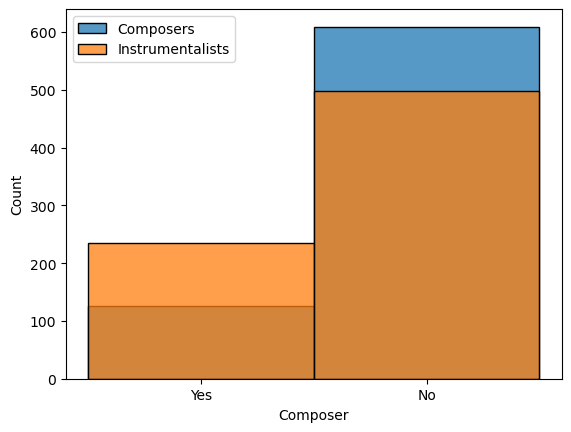

In [38]:
sns.histplot(data=mxmh_survey_results, x="Composer", bins=2, label = "Composers", multiple="stack")
sns.histplot(data=mxmh_survey_results, x="Instrumentalist", bins=2, label = "Instrumentalists")
plt.legend()
plt.show()


### Music Effects

<Axes: xlabel='Music effects', ylabel='Count'>

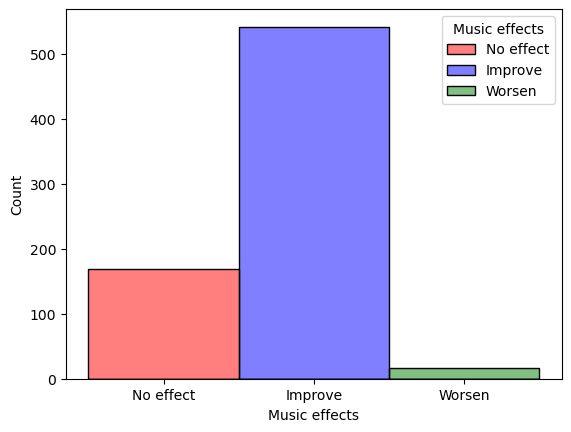

In [39]:
sns.histplot(data=mxmh_survey_results, x='Music effects', hue='Music effects', palette=['red', 'blue', 'green'])

### Outliers Exist; We'll Clean These Up Later

#### Frequency
* Gospel

#### Fav genre
* Latin
* Gospel

#### Hours Per Day

<Axes: xlabel='Hours per day', ylabel='Count'>

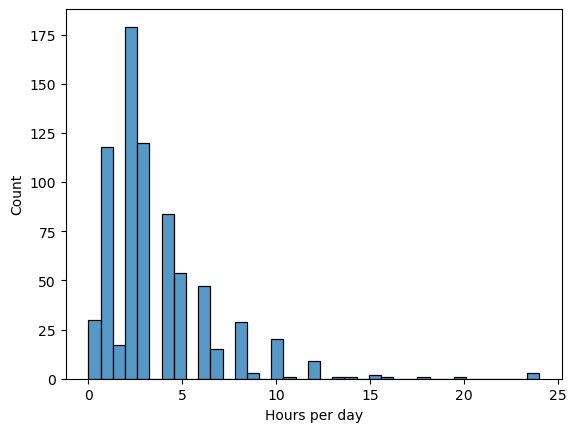

In [40]:
sns.histplot(data=mxmh_survey_results, x='Hours per day')

Some people said they listen 24 hours per day.

In [41]:
sum(mxmh_survey_results['Hours per day'] == 24)

3

#### Age

<Axes: xlabel='Age', ylabel='Count'>

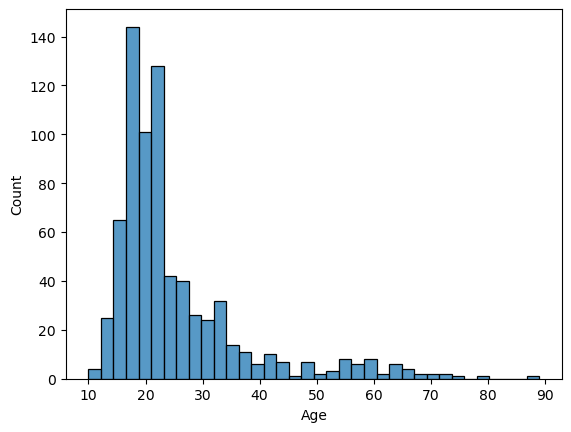

In [42]:
sns.histplot(data=mxmh_survey_results, x='Age')

In [43]:
sum(mxmh_survey_results['Age'] > 70)

6

## Clean / Manipulate Data (Wrangling)

### Handle Missing Data

In [44]:
## Let's look at BPM. Can we take the values from other fav genre observations? -->

In [45]:
# mxmh_survey_results[mxmh_survey_results["BPM"].isna()]

In [46]:
# #is  my assumption that there will be other observed BPMs for a given fav genre correct? Are there enough? Yes
# mxmh_survey_results["Fav genre"].unique()

# #Since we only consider 16 fav genres, there must be other observed BPMs to replace the 107 missing BPMs

In [47]:
# #Is my assumption that all fav genres have the same BPM correct? No
# mxmh_survey_results["BPM"][mxmh_survey_results["Fav genre"] == "Pop"]

In [48]:
# mxmh_survey_results["BPM"].unique

# #why is there a unique BPM for each participant????

In [49]:
## Okay that's weird. I'm not understanding something about what the feature is. But I'm just gonna handle it by replacing NAs with median BMPs of each fav genre


In [50]:
### what are the median BPMs of each fav genre so I can make sure the handling worked correctly

#Testing with pop only
mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Pop"]["BPM"].median()

120.0

In [51]:
# #I cant use: #for i, val in enumerate(mxmh_survey_results["BPM"]):
#                  #if val == "NaN" 
# sum(mxmh_survey_results["BPM"] == "NaN")

In [52]:
# for i, val in enumerate(mxmh_survey_results["BPM"].isna()):
#     if mxmh_survey_results["Fav genre"] == "Latin":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Latin"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Rock":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Rock"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Video game music":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Video game music"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Jazz":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Jazz"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "R&B":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "R&B"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "K pop":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "K pop"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Country":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Country"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "EDM":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "EDM"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Hip hop":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Hip hop"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Pop":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Pop"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Rap":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Rap"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Classical":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Classical"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Metal":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Metal"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Folk":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Folk"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Lofi":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Lofi"]["BPM"].median()
#     if mxmh_survey_results["Fav genre"] == "Gospel":
#         mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Gospel"]["BPM"].median()

This line: if mxmh_survey_results["Fav genre"] == "Latin":
is giving me this error: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
So let's change the way we say if the genre is X

In [53]:
for i, val in enumerate(mxmh_survey_results["BPM"].isna()):
        genre = mxmh_survey_results.loc[i, "Fav genre"]  # Get the genre for the current row
        if genre == "Latin":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Latin"]["BPM"].median()
        if genre == "Rock":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Rock"]["BPM"].median()
        if genre == "Video game music":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Video game music"]["BPM"].median()
        if genre == "Jazz":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Jazz"]["BPM"].median()
        if genre == "R&B":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "R&B"]["BPM"].median()
        if genre == "K pop":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "K pop"]["BPM"].median()
        if genre == "Country":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Country"]["BPM"].median()
        if genre == "EDM":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "EDM"]["BPM"].median()
        if genre == "Hip hop":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Hip hop"]["BPM"].median()
        if genre == "Pop":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Pop"]["BPM"].median()
        if genre == "Rap":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Rap"]["BPM"].median()
        if genre == "Classical":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Classical"]["BPM"].median()
        if genre == "Metal":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Metal"]["BPM"].median()
        if genre == "Folk":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Folk"]["BPM"].median()
        if genre == "Lofi":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Lofi"]["BPM"].median()
        if genre == "Gospel":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Gospel"]["BPM"].median()

In [54]:
#Are there 0 NAs in BPM now?
sum(mxmh_survey_results["BPM"].isna())

0

In [55]:
#testing: 
##This should all say 120 now
mxmh_survey_results["BPM"][mxmh_survey_results["Fav genre"] == "Pop"]

15     120.0
23     120.0
25     120.0
27     120.0
28     120.0
       ...  
722    120.0
723    120.0
724    120.0
729    120.0
732    120.0
Name: BPM, Length: 114, dtype: float64

In [56]:
mxmh_survey_results

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

##### The remaining missing vals will be deleted when those features are analyzed.

##### Now that we're done handling missing values for now, let's rerun our missing vals heatmap:

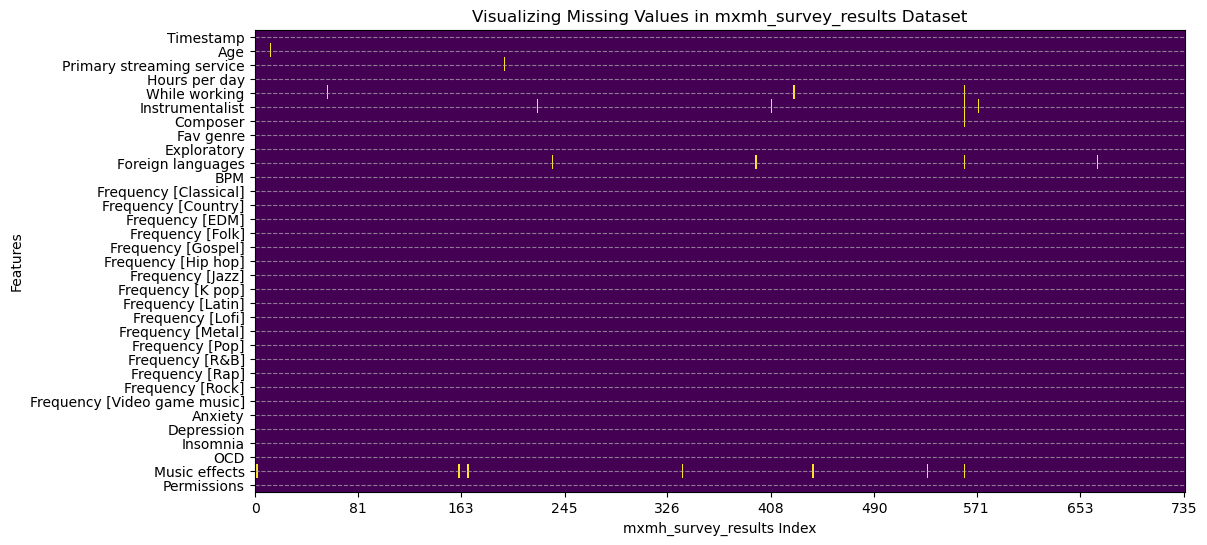

In [57]:
#make a heatmap of the missing data

##################Using code given in ICA 2 

#import numpy and nickname it np
import numpy as np 

#import matplotlib as plt
import matplotlib.pyplot as plt

#make a smaller dataset of just four colunns from planets 
#global_playlists_subset = global_playlists[["number", "orbital_period", "mass", "distance"]]
#I dont need just numerical right? Can I include my categoricals?

# create a boolean mask: True for NaN, False for finite values
nan_mask = mxmh_survey_results.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot 12 x 6 
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
# interpoltation is finding the best fit of data 
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

# label the x axis Planet Index
plt.xlabel('mxmh_survey_results Index')
# label the y axis Features
plt.ylabel('Features')
# title the whole plot Visualizing Missing Values in a Dataset 
plt.title('Visualizing Missing Values in mxmh_survey_results Dataset')

# y-axis tick labels to feature names
# make the y-axis go from 0 to 4 and label them the names of the subset columns
plt.yticks(range(len(mxmh_survey_results.columns)), mxmh_survey_results.columns)

# x-axis ticks
#
num_participants = nan_array.shape[0]
plt.xticks(np.linspace(0, num_participants-1, min(10, num_participants)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


### Handling Outliers 

#### Hours per day

In [58]:
#I don't trust the participants who say they listen to music 24hrs/day
cleaned_data = mxmh_survey_results.copy()
#I will say the max they could realistically listen to is 16 hrs
cleaned_data = cleaned_data[(cleaned_data["Hours per day"] < 16)]
cleaned_data.shape
#deleted 6 rows

(730, 33)

In [59]:
#did this affect NAs? (asking because of an error I got later on)
cleaned_data.isna().sum()

Timestamp                       0
Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

#### Age

In [60]:
#what's are age range look like? What should my cutoff be?
cleaned_data["Age"].describe()

##It looks like taking away the 24hr responses above also took away the age=90 outliers, but there's still more.

#75% is under 28 and the sd is 11.8  
## I'll do 3 sds

count    729.000000
mean      25.160494
std       11.856295
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       80.000000
Name: Age, dtype: float64

In [61]:
cleaned_data = cleaned_data[(cleaned_data["Age"] > 18) & (cleaned_data["Age"] < 64)] ############ keep between 18 and 63 
cleaned_data.shape ######## took away 250 observations

(480, 33)

In [62]:
#did this affect NAs? (asking because of an error I got later on)
cleaned_data.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 1
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               2
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

Should I delete genres that aren't popular? Those are basically outliers.

### Recode Frequency Values

In [63]:
''' List of these columns:
'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', '''

#what are the ranges?
cleaned_data["Frequency [Country]"].unique()

#I want to make sure all frequency columns have those same levels because on the site, it looks like they have different levels.
#mxmh_survey_results["Frequency [Country]"].unique() == mxmh_survey_results["Frequency [EDM]"].unique()
##might not work, might be in diff order

array(['Never', 'Very frequently', 'Rarely', 'Sometimes'], dtype=object)

In [64]:
################## Country
# for i, val in enumerate(mxmh_survey_results["Frequency [Country]"]):
#     if val == "Never":
#         mxmh_survey_results["Frequency [Country]"].loc[i] = 1
#     if val == "Rarely":
#         mxmh_survey_results["Frequency [Country]"].loc[i] = 2
#     if val == "Sometimes":
#         mxmh_survey_results["Frequency [Country]"].loc[i] = 3
#     if val == "Very Frequently":
#         mxmh_survey_results["Frequency [Country]"].loc[i] = 4

###################Instead of doing this 16 times for each of the Frequency columns, let's just do this for the whole dataset because those are the only columns with "Never" "Sometimes" Rarely" and "Very Frequently" values

# for i, val in enumerate(mxmh_survey_results):
#     if val == "Never":
#         mxmh_survey_results.loc[i] = 1
#     if val == "Rarely":
#         mxmh_survey_results.loc[i] = 2
#     if val == "Sometimes":
#         mxmh_survey_results.loc[i] = 3
#     if val == "Very Frequently":
#         mxmh_survey_results.loc[i] = 4



##############################################################################this messes my data up, adds NaNs
# #from chat
# #loop through each column and each row value
# for col in cleaned_data.columns:
#     for i, val in enumerate(cleaned_data[col]):
#         if val == "Never":
#             cleaned_data.loc[i, col] = 1
#         elif val == "Rarely":
#             cleaned_data.loc[i, col] = 2
#         elif val == "Sometimes":
#             cleaned_data.loc[i, col] = 3
#         elif val == "Very frequently":
#             cleaned_data.loc[i, col] = 4


In [65]:
#This is from chatGPT
#could also do this:

# Define the mapping
frequency_mapping = {
    "Never": 1,
    "Rarely": 2,
    "Sometimes": 3,
    "Very frequently": 4
}

# Replace the values in the "Frequency [Country]" column
cleaned_data["Frequency [Latin]"] = cleaned_data["Frequency [Latin]"].replace(frequency_mapping)
cleaned_data["Frequency [Rock]"] = cleaned_data["Frequency [Rock]"].replace(frequency_mapping)
cleaned_data["Frequency [Video game music]"] = cleaned_data["Frequency [Video game music]"].replace(frequency_mapping)
cleaned_data["Frequency [Jazz]"] = cleaned_data["Frequency [Jazz]"].replace(frequency_mapping)
cleaned_data["Frequency [R&B]"] = cleaned_data["Frequency [R&B]"].replace(frequency_mapping)
cleaned_data["Frequency [K pop]"] = cleaned_data["Frequency [K pop]"].replace(frequency_mapping)
cleaned_data["Frequency [Country]"] = cleaned_data["Frequency [Country]"].replace(frequency_mapping)
cleaned_data["Frequency [EDM]"] = cleaned_data["Frequency [EDM]"].replace(frequency_mapping)
cleaned_data["Frequency [Hip hop]"] = cleaned_data["Frequency [Hip hop]"].replace(frequency_mapping)
cleaned_data["Frequency [Pop]"] = cleaned_data["Frequency [Pop]"].replace(frequency_mapping)
cleaned_data["Frequency [Rap]"] = cleaned_data["Frequency [Rap]"].replace(frequency_mapping)
cleaned_data["Frequency [Classical]"] = cleaned_data["Frequency [Classical]"].replace(frequency_mapping)
cleaned_data["Frequency [Metal]"] = cleaned_data["Frequency [Metal]"].replace(frequency_mapping)
cleaned_data["Frequency [Folk]"] = cleaned_data["Frequency [Folk]"].replace(frequency_mapping)
cleaned_data["Frequency [Lofi]"] = cleaned_data["Frequency [Lofi]"].replace(frequency_mapping)
cleaned_data["Frequency [Gospel]"] = cleaned_data["Frequency [Gospel]"].replace(frequency_mapping)




/tmp/local/44891459/ipykernel_855241/584089459.py:13: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/local/44891459/ipykernel_855241/584089459.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/local/44891459/ipykernel_855241/584089459.py:15: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp

In [66]:
cleaned_data ############## no NaNs

Timestamp   Age          Primary streaming service  \
1     8/27/2022 19:57:31  63.0                            Pandora   
3     8/27/2022 21:40:40  61.0                      YouTube Music   
7     8/27/2022 22:18:59  21.0                            Spotify   
8     8/27/2022 22:33:05  19.0                            Spotify   
11    8/27/2022 23:00:32  19.0                      YouTube Music   
..                   ...   ...                                ...   
729  10/30/2022 13:13:32  21.0  I do not use a streaming service.   
730  10/30/2022 13:15:26  21.0                            Spotify   
733   11/3/2022 23:24:38  19.0            Other streaming service   
734   11/4/2022 17:31:47  19.0                            Spotify   
735    11/9/2022 1:55:20  29.0                      YouTube Music   

     Hours per day While working Instrumentalist Composer  Fav genre  \
1              1.5           Yes              No       No       Rock   
3              2.5           Yes              No      Yes       Jazz   
7              1.0           Yes              No       No      K pop   
8              6.0           Yes              No       No       Rock   
11             8.0           Yes              No       No        EDM   
..             ...           ...             ...      ...        ...   
729            0.5            No              No       No        Pop   
730            2.0           Yes              No       No        R&B   
733            6.0           Yes              No      Yes        Rap   
734            5.0           Yes             Yes       No  Classical   
735            2.0           Yes              No       No    Hip hop   

    Exploratory Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
1           Yes                No  ...                3                2   
3           Yes               Yes  ...                3                1   
7           Yes               Yes  ...                3                2   
8            No                No  ...                1                1   
11          Yes                No  ...                2                3   
..          ...               ...  ...              ...              ...   
729         Yes                No  ...                3                3   
730         Yes               Yes  ...                4                3   
733         Yes                No  ...                3                3   
734          No                No  ...                1                1   
735         Yes               Yes  ...                4                4   

     Frequency [Rock]  Frequency [Video game music]  Anxiety  Depression  \
1                   4                             2      7.0         2.0   
3                   1                             1      9.0         7.0   
7                   1                             2      5.0         3.0   
8                   4                             1      2.0         0.0   
11                  2                             2      1.0         0.0   
..                ...                           ...      ...         ...   
729                 4                             1      6.0         2.0   
730                 3                             3      7.0         6.0   
733                 2                             2      2.0         2.0   
734                 1                             3      2.0         3.0   
735                 4                             2      2.0         2.0   

     Insomnia  OCD  Music effects    Permissions  
1         2.0  1.0            NaN  I understand.  
3         3.0  3.0        Improve  I understand.  
7         5.0  3.0        Improve  I understand.  
8         0.0  0.0        Improve  I understand.  
11        0.0  1.0        Improve  I understand.  
..        ...  ...            ...            ...  
729       2.0  0.0        Improve  I understand.  
730       4.0  6.0        Improve  I understand.  
733       2.0  2.0        Improve  I

## Encode Primary streaming service (one hot encoder)

In [67]:
#initialize
onehot = OneHotEncoder()
#fit_transform "fits transformer to [data]... and returns a transformed version of [data]" (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
encoded = onehot.fit_transform(cleaned_data[['Primary streaming service']])

unique_values = cleaned_data['Primary streaming service'].unique()
#create a list of strings that will be the encoded columns' titles
#for each value in the column, create an element called "Pclass_ith  value"
feature_names = [f'Primary streaming service_{val}' for val in unique_values]

# convert to DataFrame
#pass the encoded data into the DataFrame function and assign column names as feature_names
#why do we use encoded.toarray() : "OneHotEncoder will by default return a sparse matrix, which is less intuitive to work with...However if you call toarray, you get something that is easier to work with, or at least easier to comprehend." (https://stackoverflow.com/questions/52846604/using-toarray-with-onehotencoding-during-data-preprocessing)
encoded_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
#show the top 5 rows of the encoded dataframe
#print(encoded_df.head())

#add back to cleaned_data
#concatenate encoded_df to cleaned_data
#cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)
#cleaned_data = cleaned_data.drop("Primary streaming service")
#cleaned_data

#reset index because it added NaNs when I didn't do this before concatenating 
cleaned_data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

#concatenate encoded_df to cleaned_data
cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)

# cleaned_data = cleaned_data.drop(columns=["Primary streaming service"])

In [68]:
cleaned_data

Timestamp   Age          Primary streaming service  \
0     8/27/2022 19:57:31  63.0                            Pandora   
1     8/27/2022 21:40:40  61.0                      YouTube Music   
2     8/27/2022 22:18:59  21.0                            Spotify   
3     8/27/2022 22:33:05  19.0                            Spotify   
4     8/27/2022 23:00:32  19.0                      YouTube Music   
..                   ...   ...                                ...   
475  10/30/2022 13:13:32  21.0  I do not use a streaming service.   
476  10/30/2022 13:15:26  21.0                            Spotify   
477   11/3/2022 23:24:38  19.0            Other streaming service   
478   11/4/2022 17:31:47  19.0                            Spotify   
479    11/9/2022 1:55:20  29.0                      YouTube Music   

     Hours per day While working Instrumentalist Composer  Fav genre  \
0              1.5           Yes              No       No       Rock   
1              2.5           Yes              No      Yes       Jazz   
2              1.0           Yes              No       No      K pop   
3              6.0           Yes              No       No       Rock   
4              8.0           Yes              No       No        EDM   
..             ...           ...             ...      ...        ...   
475            0.5            No              No       No        Pop   
476            2.0           Yes              No       No        R&B   
477            6.0           Yes              No      Yes        Rap   
478            5.0           Yes             Yes       No  Classical   
479            2.0           Yes              No       No    Hip hop   

    Exploratory Foreign languages  ...  OCD  Music effects    Permissions  \
0           Yes                No  ...  1.0            NaN  I understand.   
1           Yes               Yes  ...  3.0        Improve  I understand.   
2           Yes               Yes  ...  3.0        Improve  I understand.   
3            No                No  ...  0.0        Improve  I understand.   
4           Yes                No  ...  1.0        Improve  I understand.   
..          ...               ...  ...  ...            ...            ...   
475         Yes                No  ...  0.0        Improve  I understand.   
476         Yes               Yes  ...  6.0        Improve  I understand.   
477         Yes                No  ...  2.0        Improve  I understand.   
478          No                No  ...  1.0        Improve  I understand.   
479         Yes               Yes  ...  5.0        Improve  I understand.   

     Primary streaming service_Pandora  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
..                                 ...   
475                                0.0   
476                                0.0   
477                                0.0   
478                                0.0   
479                                0.0   

     Primary streaming service_YouTube Music  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
..                                       ...   
475                                      1.0   
476                                      0.0   
477                                      0.0   
478                                      0.0   
479                                      0.0   

     Primary streaming service_Spotify  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
..                                 ...   
475                 

In [69]:
## Encode Fav Genre (one hot encoder)

In [70]:
#initialize
onehot = OneHotEncoder()
#fit_transform "fits transformer to [data]... and returns a transformed version of [data]" (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
encoded = onehot.fit_transform(cleaned_data[['Fav genre']])

unique_values = cleaned_data['Fav genre'].unique()
#create a list of strings that will be the encoded columns' titles
#for each value in the column, create an element called "Pclass_ith  value"
feature_names = [f'Fav genre_{val}' for val in unique_values]

# convert to DataFrame
#pass the encoded data into the DataFrame function and assign column names as feature_names
#why do we use encoded.toarray() : "OneHotEncoder will by default return a sparse matrix, which is less intuitive to work with...However if you call toarray, you get something that is easier to work with, or at least easier to comprehend." (https://stackoverflow.com/questions/52846604/using-toarray-with-onehotencoding-during-data-preprocessing)
encoded_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
#show the top 5 rows of the encoded dataframe
#print(encoded_df.head())

#add back to cleaned_data
#concatenate encoded_df to cleaned_data
#cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)
#cleaned_data = cleaned_data.drop("Primary streaming service")
#cleaned_data

#reset index because it added NaNs when I didn't do this before concatenating 
cleaned_data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

#concatenate encoded_df to cleaned_data
cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)

# cleaned_data = cleaned_data.drop(columns=["Primary streaming service"])

In [71]:
cleaned_data

Timestamp   Age          Primary streaming service  \
0     8/27/2022 19:57:31  63.0                            Pandora   
1     8/27/2022 21:40:40  61.0                      YouTube Music   
2     8/27/2022 22:18:59  21.0                            Spotify   
3     8/27/2022 22:33:05  19.0                            Spotify   
4     8/27/2022 23:00:32  19.0                      YouTube Music   
..                   ...   ...                                ...   
475  10/30/2022 13:13:32  21.0  I do not use a streaming service.   
476  10/30/2022 13:15:26  21.0                            Spotify   
477   11/3/2022 23:24:38  19.0            Other streaming service   
478   11/4/2022 17:31:47  19.0                            Spotify   
479    11/9/2022 1:55:20  29.0                      YouTube Music   

     Hours per day While working Instrumentalist Composer  Fav genre  \
0              1.5           Yes              No       No       Rock   
1              2.5           Yes              No      Yes       Jazz   
2              1.0           Yes              No       No      K pop   
3              6.0           Yes              No       No       Rock   
4              8.0           Yes              No       No        EDM   
..             ...           ...             ...      ...        ...   
475            0.5            No              No       No        Pop   
476            2.0           Yes              No       No        R&B   
477            6.0           Yes              No      Yes        Rap   
478            5.0           Yes             Yes       No  Classical   
479            2.0           Yes              No       No    Hip hop   

    Exploratory Foreign languages  ...  Fav genre_R&B  Fav genre_Classical  \
0           Yes                No  ...            0.0                  0.0   
1           Yes               Yes  ...            0.0                  1.0   
2           Yes               Yes  ...            0.0                  0.0   
3            No                No  ...            0.0                  0.0   
4           Yes                No  ...            0.0                  0.0   
..          ...               ...  ...            ...                  ...   
475         Yes                No  ...            0.0                  0.0   
476         Yes               Yes  ...            0.0                  0.0   
477         Yes                No  ...            0.0                  0.0   
478          No                No  ...            0.0                  0.0   
479         Yes               Yes  ...            1.0                  0.0   

     Fav genre_Metal  Fav genre_Pop  Fav genre_Video game music  \
0                0.0            0.0                         0.0   
1                0.0            0.0                         0.0   
2                1.0            0.0                         0.0   
3                0.0            0.0                         0.0   
4                0.0            0.0                         0.0   
..               ...            ...                         ...   
475              0.0            0.0                         0.0   
476              0.0            0.0                         0.0   
477              0.0            0.0                         0.0   
478              0.0            0.0                         0.0   
479              0.0            0.0                         0.0   

     Fav genre_Rap  Fav genre_Folk  Fav genre_Hip hop  Fav genre_Gospel  \
0              0.0             0.0                0.0               1.0   
1              0.0             0.0                0.0               0.0   
2              0.0             0.0                0.0               0.0   
3              0.0             0.0                0.0               1.0   
4              0.0             0.0                0.0               0.0   
..             ...             ...                ...               ...   
475            1.0             0.0                0.0 

In [72]:
### Recode Fav Genre So We Can Run Analysis On It ######### No because it would still be nominal 

In [73]:
#mxmh_survey_results["Fav genre"].unique()

Possible values = 
* Latin...................................1
* Rock....................................2
* Video game music........................3
* Jazz....................................4
* R&B.....................................5
* K pop...................................6
* 'Countr.................................7
* 'ED.....................................8
* 'Hip ho.................................9
* 'Po.....................................10
* 'Ra.....................................11
* 'Classica...............................12
* 'Meta...................................13
*  'Fo....................................14
*  'Lo....................................15
*  'Gosp..................................16],

In [74]:
# for i, val in enumerate(mxmh_survey_results["Fav genre"]):
#     if val == "Latin":
#         mxmh_survey_results["Fav genre"].loc[i] = 1
#     if val == "Rock":
#         mxmh_survey_results["Fav genre"].loc[i] = 2
#     if val == "Video game music":
#         mxmh_survey_results["Fav genre"].loc[i] = 3
#     if val == "Jazz":
#         mxmh_survey_results["Fav genre"].loc[i] = 4
#     if val == "R&B":
#         mxmh_survey_results["Fav genre"].loc[i] = 5
#     if val == "K pop":
#         mxmh_survey_results["Fav genre"].loc[i] = 6
#     if val == "Country":
#         mxmh_survey_results["Fav genre"].loc[i] = 7
#     if val == "EDM":
#         mxmh_survey_results["Fav genre"].loc[i] = 8
#     if val == "Hip hop":
#         mxmh_survey_results["Fav genre"].loc[i] = 9
#     if val == "Pop":
#         mxmh_survey_results["Fav genre"].loc[i] = 10
#     if val == "Rap":
#         mxmh_survey_results["Fav genre"].loc[i] = 11
#     if val == "Classical":
#         mxmh_survey_results["Fav genre"].loc[i] = 12
#     if val == "Metal":
#         mxmh_survey_results["Fav genre"].loc[i] = 13
#     if val == "Folk":
#         mxmh_survey_results["Fav genre"].loc[i] = 14
#     if val == "Lofi":
#         mxmh_survey_results["Fav genre"].loc[i] = 15
#     if val == "Gospel":
#         mxmh_survey_results["Fav genre"].loc[i] = 16

### Handle The Imbalance
* reducing majority group until even instead of replicating minority group

<Axes: xlabel='Anxiety', ylabel='Count'>

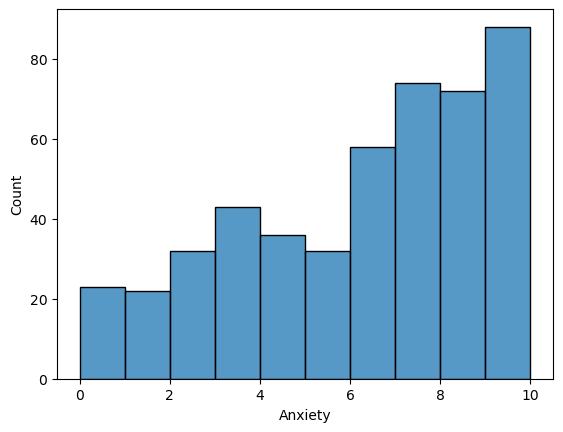

In [75]:
#Is anxiety imbalanced?
sns.histplot(data=cleaned_data, x='Anxiety')

In [76]:
# #5 and above, below 5 
# #create a column for the category 
# #cleaned_data["balanced_anxiety"] = cleaned_data["Anxiety"] 
# cleaned_data["balanced_anxiety"] = 0
# for i, val in enumerate(cleaned_data["Anxiety"]):
#         if val >= 5:
#             cleaned_data.loc[i, "balanced_anxiety"] = 1
#         else: 
#             cleaned_data.loc[i, "balanced_anxiety"] = 0


In [77]:
# cleaned_data['balanced_anxiety'].describe()

In [78]:
# sns.histplot(data=cleaned_data, x='balanced_anxiety')

In [79]:
sum(cleaned_data['Depression'].isna())

0

<Axes: xlabel='Depression', ylabel='Count'>

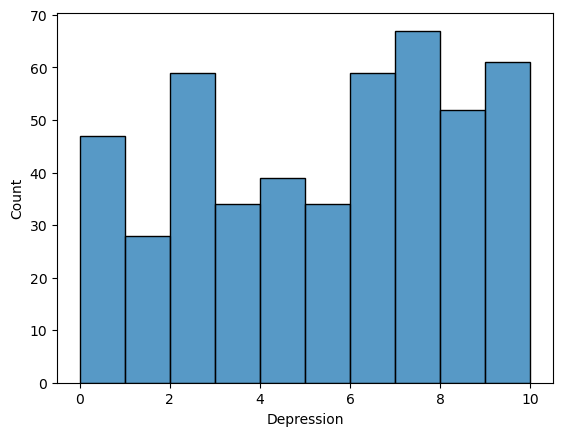

In [80]:
#Is depression imbalanced?
sns.histplot(data=cleaned_data, x='Depression')

In [81]:
# #5 and above, below 5 
# #create a column for the category 
# #cleaned_data["balanced_anxiety"] = cleaned_data["Anxiety"] 
# cleaned_data["balanced_depression"] = 0
# for i, val in enumerate(cleaned_data["Depression"]):
#         if val >= 5:
#             cleaned_data.loc[i, "balanced_depression"] = 1
#         else: 
#             cleaned_data.loc[i, "balanced_depression"] = 0


In [82]:
# sns.histplot(data=cleaned_data, x='balanced_depression')

In [83]:
sum(cleaned_data['Depression'].isna())

0

In [85]:
cleaned_data.isna().sum()

Timestamp                                                      0
Age                                                            0
Primary streaming service                                      1
Hours per day                                                  0
While working                                                  3
Instrumentalist                                                1
Composer                                                       1
Fav genre                                                      0
Exploratory                                                    0
Foreign languages                                              2
BPM                                                            0
Frequency [Classical]                                          0
Frequency [Country]                                            0
Frequency [EDM]                                                0
Frequency [Folk]                                               0
Frequency [Gospel]       

<Axes: xlabel='OCD', ylabel='Count'>

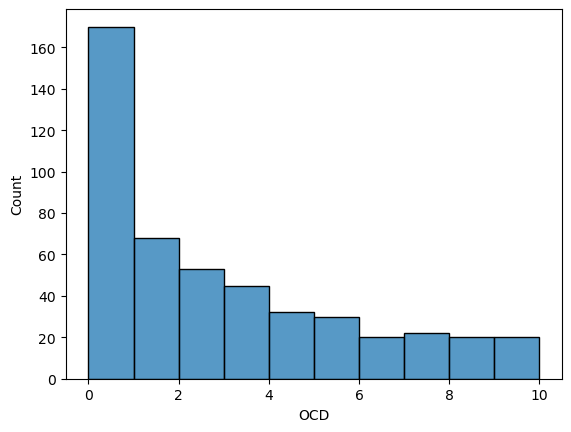

In [86]:
#Is OCD imbalanced?
sns.histplot(data=cleaned_data, x='OCD')

In [145]:
# #separate features and target variable
# #dropping timsestamp because we don't need it
# cleaned_data = cleaned_data.drop(columns=['Timestamp', 'Primary streaming service'])
# X = cleaned_data.drop(columns=['OCD'])  
# y = cleaned_data['OCD']

# #initialize SMOTE
# smote = SMOTE(random_state=42)

# #fit and resample the data
# X_resampled, y_resampled = smote.fit_resample(X, y)

# #create a new dataframe for the resampled data
# resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
# resampled_data['OCD'] = y_resampled

# #check the distribution of the target variable again to make sure this worked
# print(resampled_data['OCD'].value_counts())


ValueError: Input contains NaN

In [88]:
# sns.histplot(data=cleaned_data, x='balanced_OCD')

<Axes: xlabel='Insomnia', ylabel='Count'>

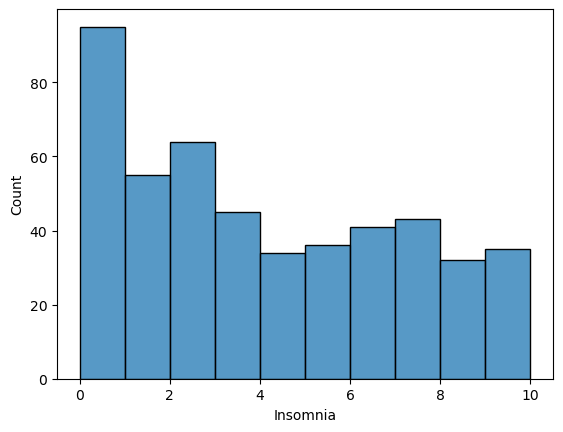

In [89]:
#Is insomnia imbalanced?
sns.histplot(data=cleaned_data, x='Insomnia')

In [90]:
# #5 and above, below 5 
# #create a column for the category 
# #cleaned_data["balanced_anxiety"] = cleaned_data["Anxiety"] 
# cleaned_data["balanced_insomnia"] = 0
# for i, val in enumerate(cleaned_data["Insomnia"]):
#         if val >= 5:
#             cleaned_data.loc[i, "balanced_insomnia"] = 1
#         else: 
#             cleaned_data.loc[i, "balanced_insomnia"] = 0


In [91]:
# sns.histplot(data=cleaned_data, x='balanced_insomnia')

<Axes: xlabel='Frequency [Country]', ylabel='Count'>

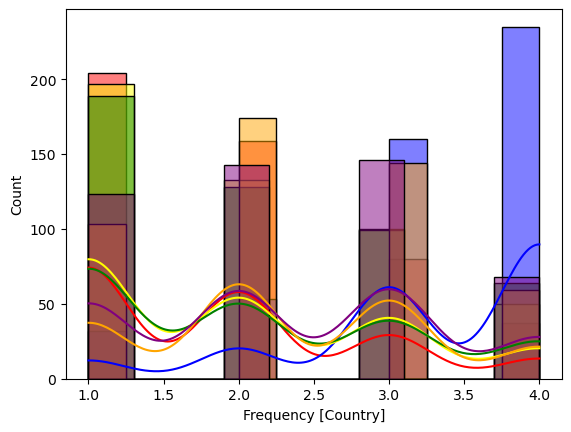

In [92]:
#Genre Frequency
#HW 5
##sns.histplot(data[data['Outcome']==1]['Glucose'], color='red', label='Diabetic', kde=True) 
sns.histplot(cleaned_data["Frequency [Country]"], color='red', label='Country', kde=True) 
sns.histplot(cleaned_data["Frequency [Rock]"], color='blue', label='Rock', kde=True) 
sns.histplot(cleaned_data["Frequency [Lofi]"], color='yellow', label='Lofi', kde=True) 
sns.histplot(cleaned_data["Frequency [EDM]"], color='green', label='EDM', kde=True) 
sns.histplot(cleaned_data["Frequency [Classical]"], color='orange', label='Classical', kde=True) 
sns.histplot(cleaned_data["Frequency [Hip hop]"], color='purple', label='Hip hop', kde=True) 

# Explore The Data

## How does MH Change With Age?

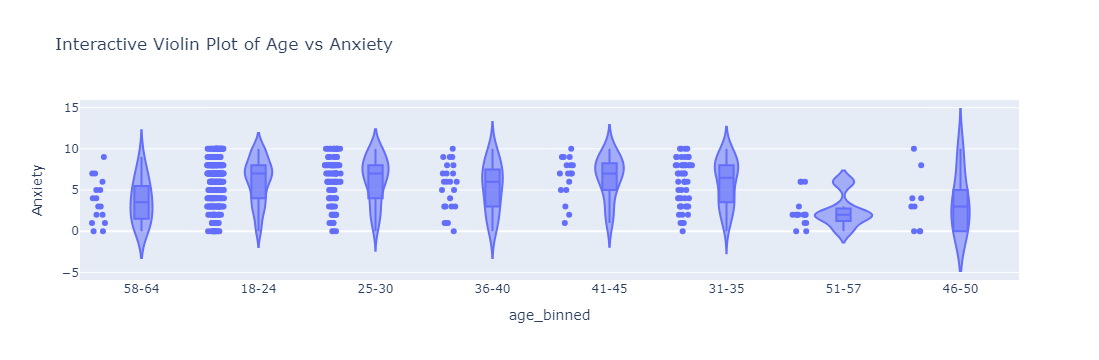

In [93]:
#How does anxiety change by age?

# #HW 4
# fig = px.scatter(mxmh_survey_results, x="Anxiety", y='Age')
# fig.show()



####################
#define the bin edges and labels
bins = [18, 25, 31, 36, 41, 46, 51, 58, 64]  
labels = ['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-57', '58-64']  # Labels for the bins

# Create the binned column
cleaned_data['age_binned'] = pd.cut(cleaned_data['Age'], bins=bins, labels=labels, right=False)

########################


#now plot it 
fig_violin = px.violin(cleaned_data, x='age_binned', y='Anxiety', box=True, points='all',
                           labels={'Age':'Age', 'Anxiety':'Anxiety'},
                           title="Interactive Violin Plot of Age vs Anxiety")

fig_violin.show()


## Any correlations? ################## will have to recode the frequencies and the fave genre 

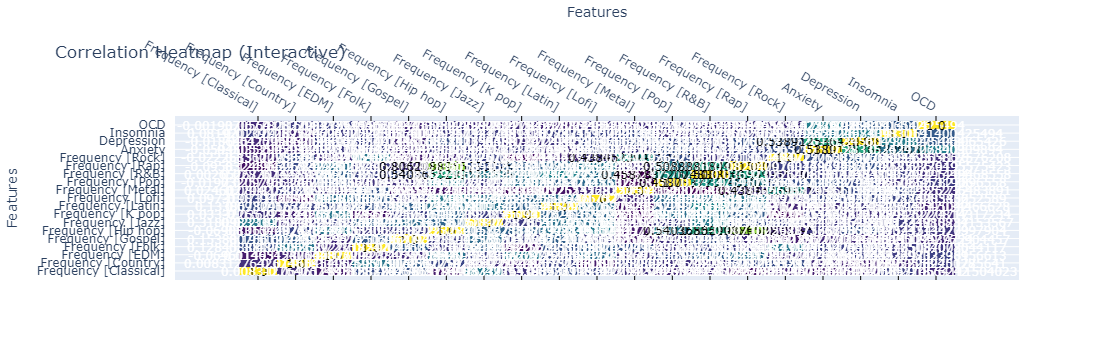

In [94]:
#make an interactive correlation heatmap (HW4)

#which features are important to consider here?
#not title, artists, date, Artist (Ind.), Nationality, Continent, Points (Ind for each Artist/Nat, id, Song URL
############what does # of nationality mean?
selected_features = ['Frequency [Classical]', "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 
                     "Frequency [Gospel]", "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                     "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]",  "Anxiety", "Depression", "Insomnia", "OCD"] # Focus on these variables

# Correlation Heatmap (Interactive)
correlation_matrix = cleaned_data[selected_features].corr().values
fig_heatmap = ff.create_annotated_heatmap(
     z=correlation_matrix,
     x=selected_features,
     y=selected_features,
     colorscale='Viridis'
 )
fig_heatmap.update_layout(
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()


### Any correlation between the numeric features? Is hours spent listening per day correlated with reported MH scores? Not strongly. (Do people who listen to more music report higher mental health scores?)

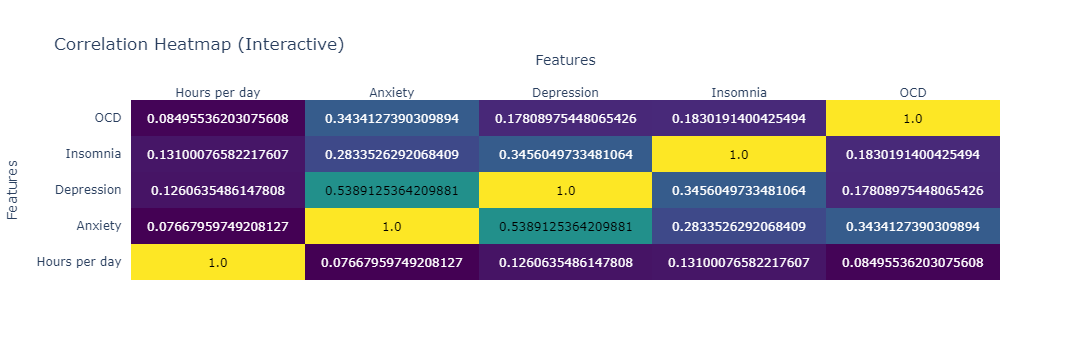

In [95]:
#make an interactive correlation heatmap (HW4)

#which features are important to consider here?
#not title, artists, date, Artist (Ind.), Nationality, Continent, Points (Ind for each Artist/Nat, id, Song URL
############what does # of nationality mean?
selected_features = ['Hours per day', "Anxiety", "Depression", "Insomnia", "OCD"] # Focus on these variables

# Correlation Heatmap (Interactive)
correlation_matrix = cleaned_data[selected_features].corr().values
fig_heatmap = ff.create_annotated_heatmap(
     z=correlation_matrix,
     x=selected_features,
     y=selected_features,
     colorscale='Viridis'
 )
fig_heatmap.update_layout(
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()


## Do the people who say yes music positively impacts MH spend more hours listening than those who say no. 

In [96]:
#what are the levels of Music Effects?
cleaned_data["Music effects"].unique()

#note to self, .unique() gives a different output than .unique

array([nan, 'Improve', 'No effect', 'Worsen'], dtype=object)

In [97]:
improve_subset = cleaned_data[cleaned_data["Music effects"] == "Improve"]
no_effect_subset = cleaned_data[cleaned_data["Music effects"] == "No effect"]
worsen_subset =  cleaned_data[cleaned_data["Music effects"] == "Worsen"]

In [98]:
print(improve_subset["Hours per day"].mean())
print(no_effect_subset["Hours per day"].mean())
print(worsen_subset["Hours per day"].mean())

3.476323529411765
3.208467741935484
2.6363636363636362


## Is fav genre associated with MH scores?

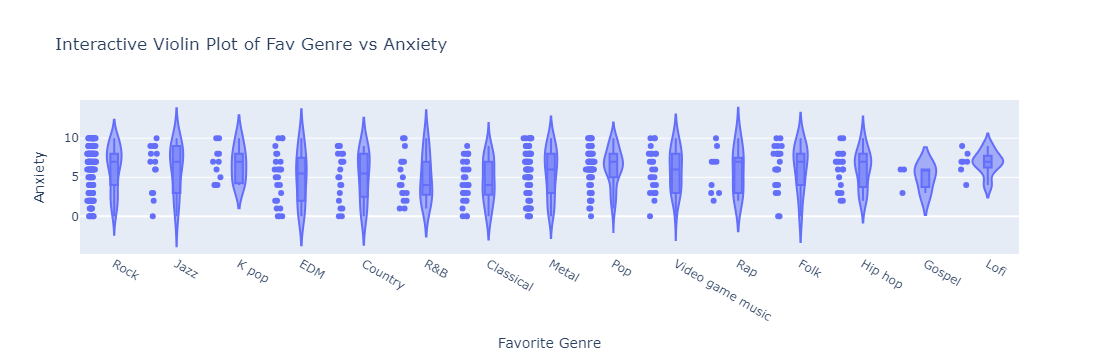

In [99]:
#Interactive Violin Plot 

fig_violin = px.violin(cleaned_data, x='Fav genre', y='Anxiety', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'Anxiety':'Anxiety'},
                           title="Interactive Violin Plot of Fav Genre vs Anxiety")

fig_violin.show()


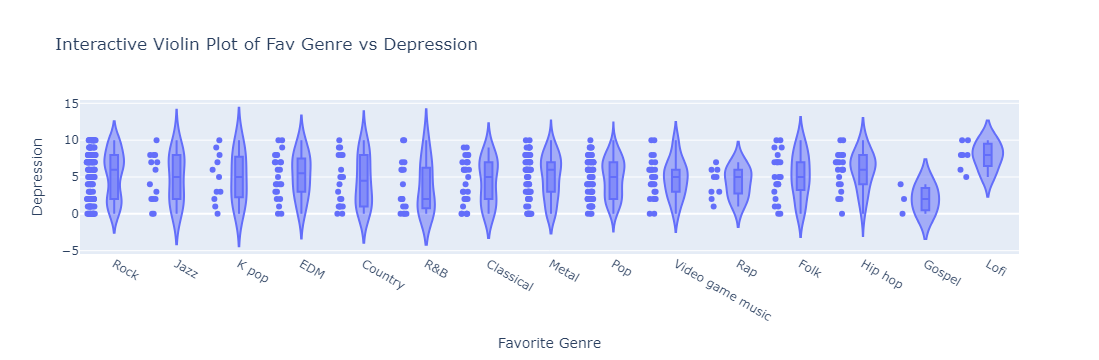

In [100]:
fig_violin = px.violin(cleaned_data, x='Fav genre', y='Depression', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'Depression':'Depression'},
                           title="Interactive Violin Plot of Fav Genre vs Depression ")

fig_violin.show()


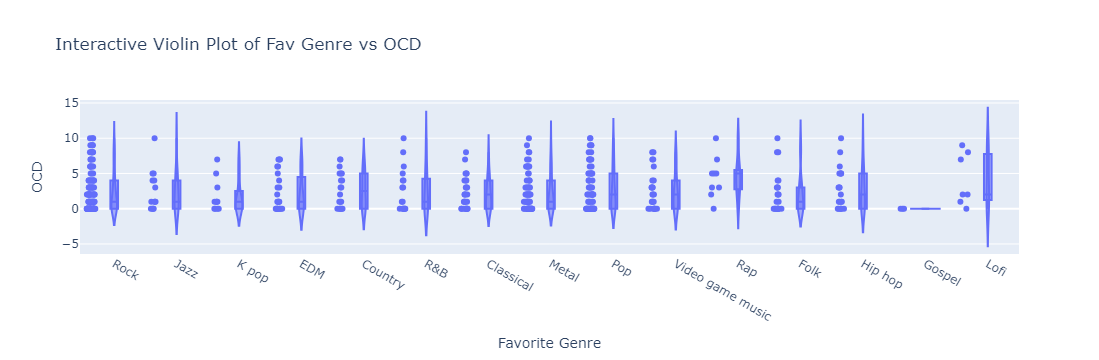

In [101]:

fig_violin = px.violin(cleaned_data, x='Fav genre', y='OCD', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'OCD':'OCD'},
                           title="Interactive Violin Plot of Fav Genre vs OCD")



fig_violin.show()


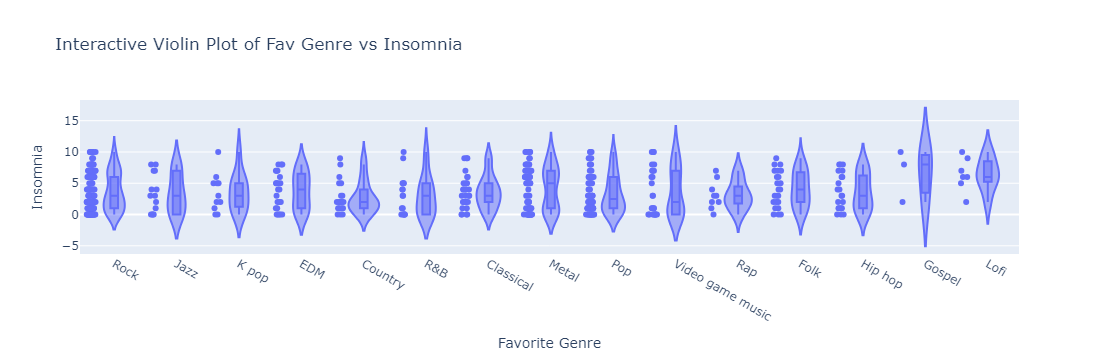

In [102]:
fig_violin = px.violin(cleaned_data, x='Fav genre', y='Insomnia', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'Insomnia':'Insomnia'},
                           title="Interactive Violin Plot of Fav Genre vs Insomnia")

fig_violin.show()


## Anxiety Scores by Genre

Text(0.5, 1.0, 'Anxiety Scores of Latin Listeners')

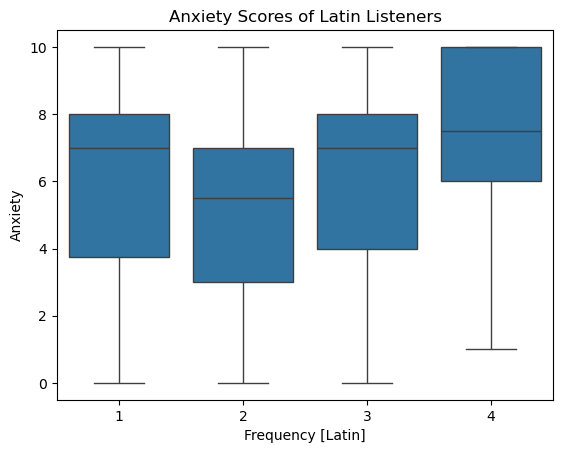

In [103]:
sns.boxplot(data=cleaned_data, x="Frequency [Latin]", y = "Anxiety")
plt.title('Anxiety Scores of Latin Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Rock Listeners')

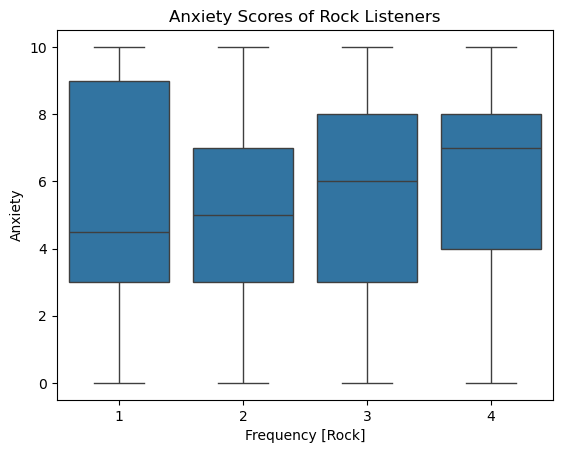

In [104]:
sns.boxplot(data=cleaned_data, x="Frequency [Rock]", y = "Anxiety")
plt.title('Anxiety Scores of Rock Listeners')

Text(0.5, 1.0, 'Anxiety Scores of VGM Listeners')

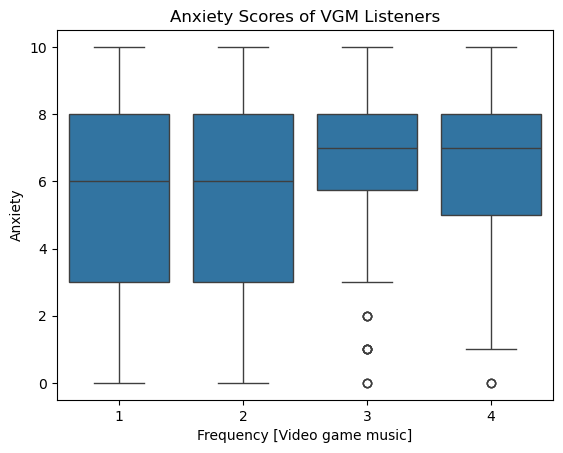

In [105]:
sns.boxplot(data=cleaned_data, x="Frequency [Video game music]", y = "Anxiety")
plt.title('Anxiety Scores of VGM Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Jazz Listeners')

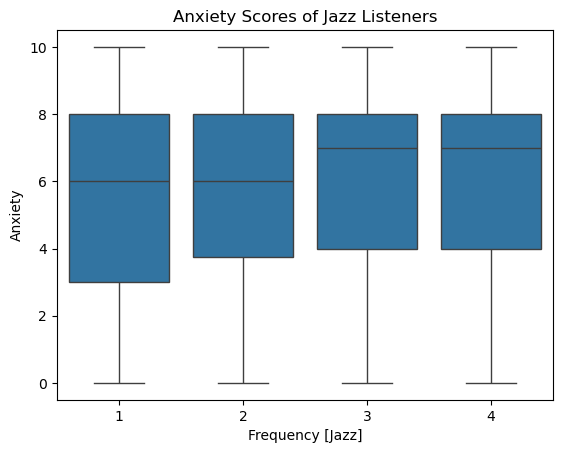

In [106]:
sns.boxplot(data=cleaned_data, x="Frequency [Jazz]", y = "Anxiety")
plt.title('Anxiety Scores of Jazz Listeners')

Text(0.5, 1.0, 'Anxiety Scores of R&B Listeners')

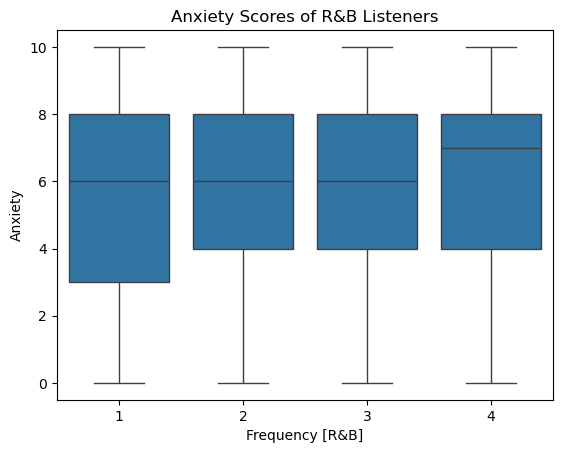

In [107]:
sns.boxplot(data=cleaned_data, x="Frequency [R&B]", y = "Anxiety")
plt.title('Anxiety Scores of R&B Listeners')

Text(0.5, 1.0, 'Anxiety Scores of K Pop Listeners')

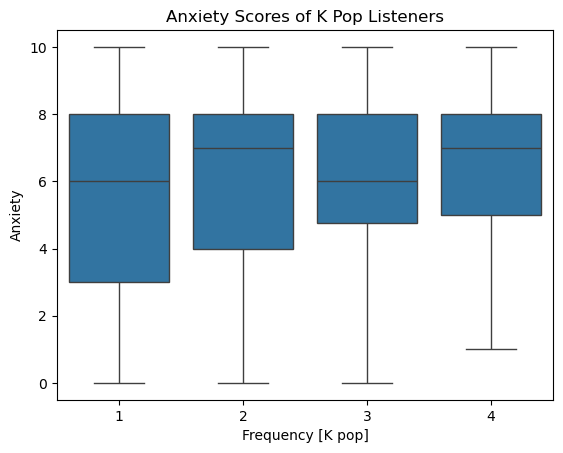

In [108]:
sns.boxplot(data=cleaned_data, x="Frequency [K pop]", y = "Anxiety")
plt.title('Anxiety Scores of K Pop Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Country Listeners')

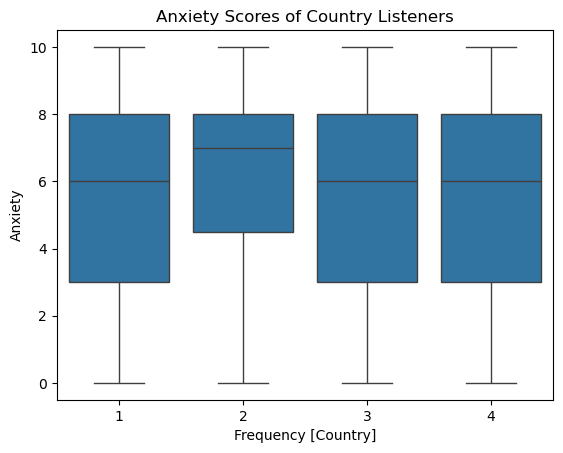

In [109]:
sns.boxplot(data=cleaned_data, x="Frequency [Country]", y = "Anxiety")
plt.title('Anxiety Scores of Country Listeners')

Text(0.5, 1.0, 'Anxiety Scores of EDM Listeners')

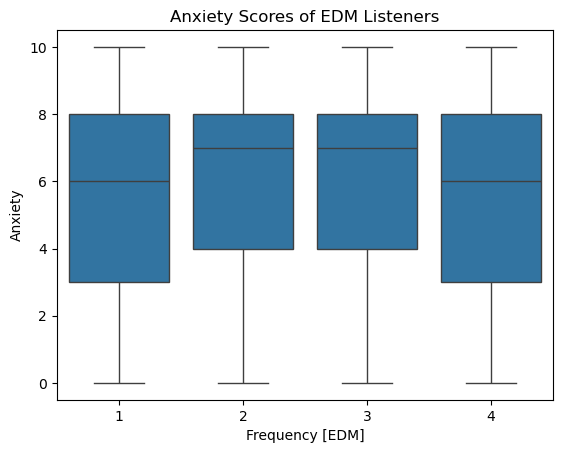

In [110]:
sns.boxplot(data=cleaned_data, x="Frequency [EDM]", y = "Anxiety")
plt.title('Anxiety Scores of EDM Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Hip Hop Listeners')

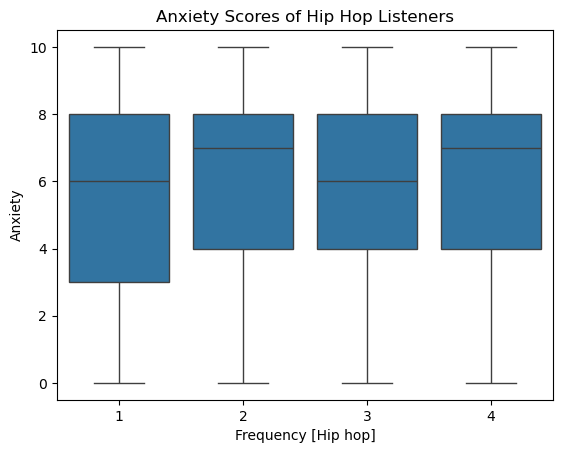

In [111]:
sns.boxplot(data=cleaned_data, x="Frequency [Hip hop]", y = "Anxiety")
plt.title('Anxiety Scores of Hip Hop Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Pop Listeners')

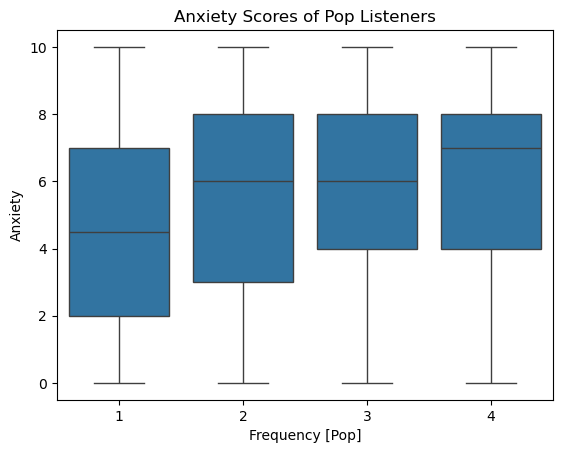

In [112]:
sns.boxplot(data=cleaned_data, x="Frequency [Pop]", y = "Anxiety")
plt.title('Anxiety Scores of Pop Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Rap Listeners')

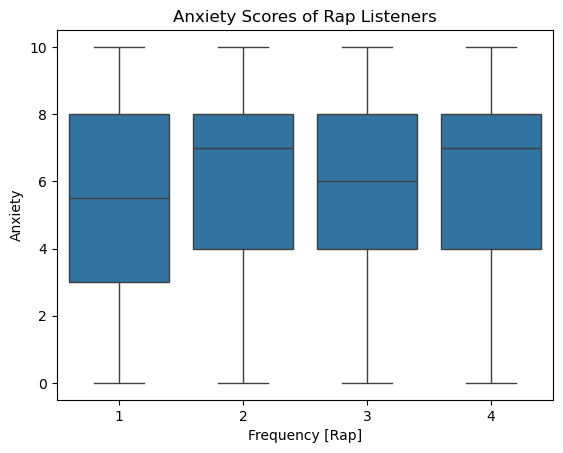

In [113]:
sns.boxplot(data=cleaned_data, x="Frequency [Rap]", y = "Anxiety")
plt.title('Anxiety Scores of Rap Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Classical Listeners')

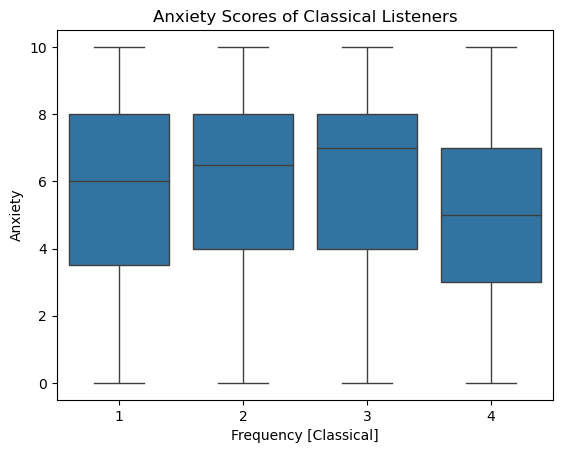

In [114]:
sns.boxplot(data=cleaned_data, x="Frequency [Classical]", y = "Anxiety")
plt.title('Anxiety Scores of Classical Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Metal Listeners')

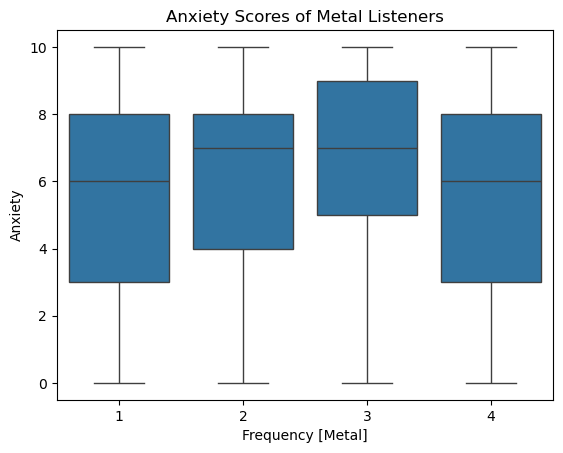

In [115]:
sns.boxplot(data=cleaned_data, x="Frequency [Metal]", y = "Anxiety")
plt.title('Anxiety Scores of Metal Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Folk Listeners')

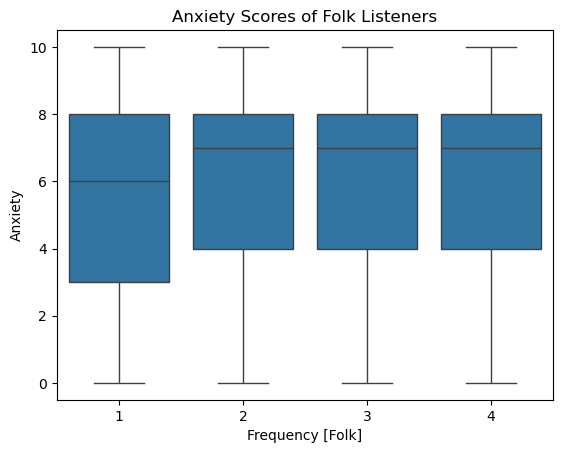

In [116]:
sns.boxplot(data=cleaned_data, x="Frequency [Folk]", y = "Anxiety")
plt.title('Anxiety Scores of Folk Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Lofi Listeners')

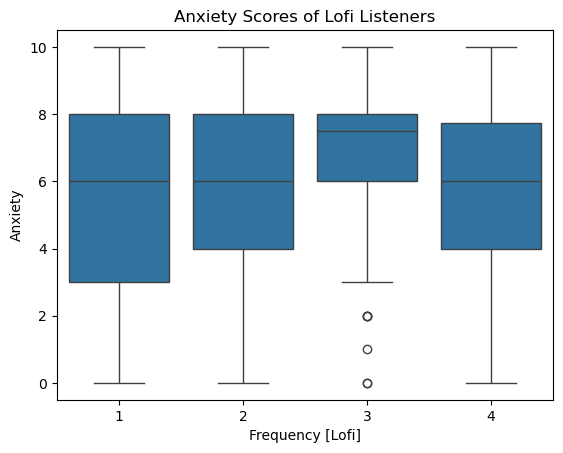

In [117]:
sns.boxplot(data=cleaned_data, x="Frequency [Lofi]", y = "Anxiety")
plt.title('Anxiety Scores of Lofi Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Gospel Listeners')

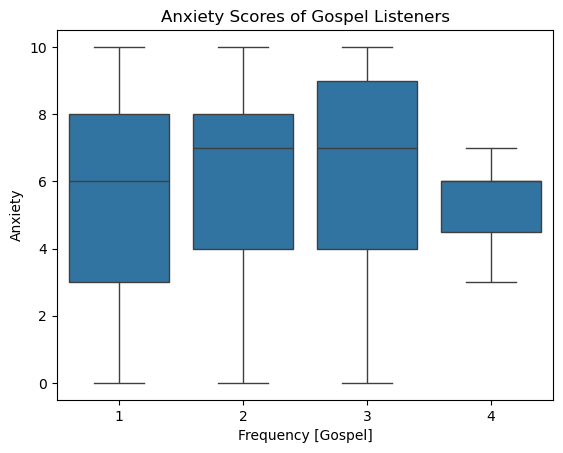

In [118]:
sns.boxplot(data=cleaned_data, x="Frequency [Gospel]", y = "Anxiety")
plt.title('Anxiety Scores of Gospel Listeners')

## Genre by Music Effects

In [119]:
improve_subset = cleaned_data[cleaned_data["Music effects"] == "Improve"]
no_effect_subset = cleaned_data[cleaned_data["Music effects"] == "No effect"]
worsen_subset =  cleaned_data[cleaned_data["Music effects"] == "Worsen"]

<Axes: xlabel='Anxiety', ylabel='Count'>

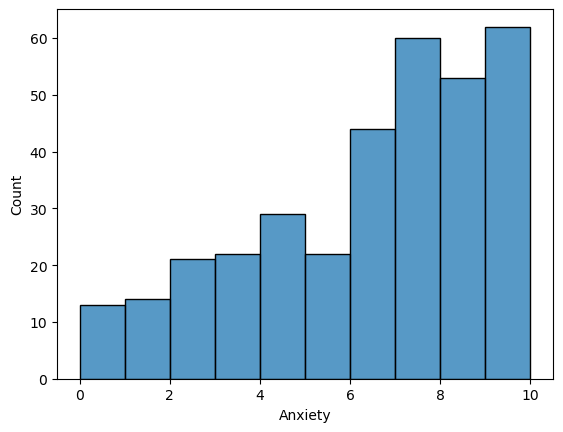

In [120]:
#do their anxiety levels match their perceived effect level?
sns.histplot(data=improve_subset, x='Anxiety')

<Axes: xlabel='Anxiety', ylabel='Count'>

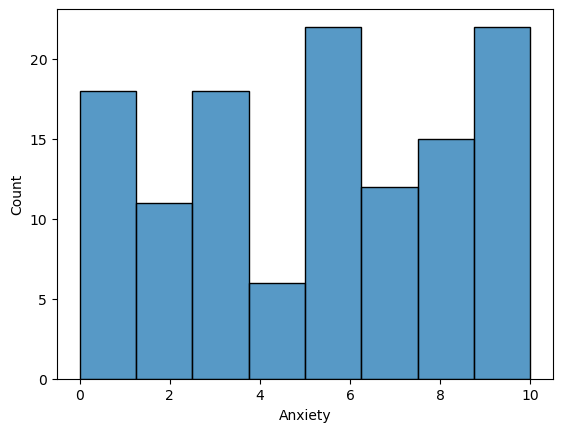

In [121]:
sns.histplot(data=no_effect_subset, x='Anxiety')

<Axes: xlabel='Anxiety', ylabel='Count'>

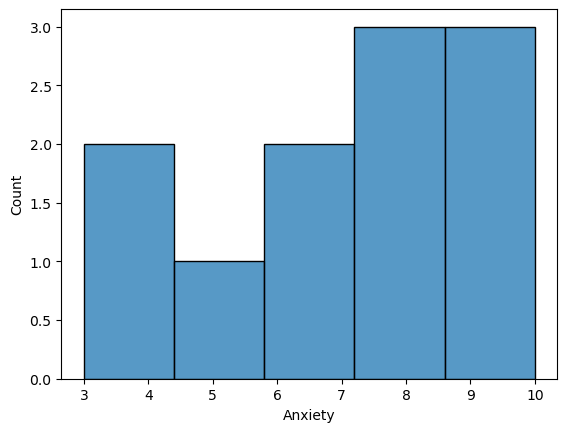

In [122]:
sns.histplot(data=worsen_subset, x='Anxiety')

## Feature engineering

* Let's make a feature called Genre Impacts where I have Neg or Pos for whether the genre is associated with higher mental health or lower. 

### Get average mh scores grouped by frequency 

In [123]:
#making latin subsets based on frequency
cleaned_data_latin1 = cleaned_data[cleaned_data["Frequency [Latin]"] == 1]
cleaned_data_latin2 = cleaned_data[cleaned_data["Frequency [Latin]"] == 2]
cleaned_data_latin3 = cleaned_data[cleaned_data["Frequency [Latin]"] == 3]
cleaned_data_latin4 = cleaned_data[cleaned_data["Frequency [Latin]"] == 4]


#now get the average MH scores for each frequency
ave_anxiety_latin1 = cleaned_data_latin1["Anxiety"].mean()
ave_dep_latin1 = cleaned_data_latin1["Depression"].mean()
ave_insom_latin1 = cleaned_data_latin1["Insomnia"].mean()
ave_ocd_latin1 = cleaned_data_latin1["OCD"].mean()

ave_anxiety_latin2 = cleaned_data_latin2["Anxiety"].mean()
ave_dep_latin2 = cleaned_data_latin2["Depression"].mean()
ave_insom_latin2 = cleaned_data_latin2["Insomnia"].mean()
ave_ocd_latin2 = cleaned_data_latin2["OCD"].mean()

ave_anxiety_latin3 = cleaned_data_latin3["Anxiety"].mean()
ave_dep_latin3 = cleaned_data_latin3["Depression"].mean()
ave_insom_latin3 = cleaned_data_latin3["Insomnia"].mean()
ave_ocd_latin3 = cleaned_data_latin3["OCD"].mean()

ave_anxiety_latin4 = cleaned_data_latin4["Anxiety"].mean()
ave_dep_latin4 = cleaned_data_latin4["Depression"].mean()
ave_insom_latin4 = cleaned_data_latin4["Insomnia"].mean()
ave_ocd_latin4 = cleaned_data_latin4["OCD"].mean()



In [124]:
#making rock subsets based on frequency
cleaned_data_rock1 = cleaned_data[cleaned_data["Frequency [Rock]"] == 1]
cleaned_data_rock2 = cleaned_data[cleaned_data["Frequency [Rock]"] == 2]
cleaned_data_rock3 = cleaned_data[cleaned_data["Frequency [Rock]"] == 3]
cleaned_data_rock4 = cleaned_data[cleaned_data["Frequency [Rock]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_rock1 = cleaned_data_rock1["Anxiety"].mean()
ave_dep_rock1 = cleaned_data_rock1["Depression"].mean()
ave_insom_rock1 = cleaned_data_rock1["Insomnia"].mean()
ave_ocd_rock1 = cleaned_data_rock1["OCD"].mean()

ave_anxiety_rock2 = cleaned_data_rock2["Anxiety"].mean()
ave_dep_rock2 = cleaned_data_rock2["Depression"].mean()
ave_insom_rock2 = cleaned_data_rock2["Insomnia"].mean()
ave_ocd_rock2 = cleaned_data_rock2["OCD"].mean()

ave_anxiety_rock3 = cleaned_data_rock3["Anxiety"].mean()
ave_dep_rock3 = cleaned_data_rock3["Depression"].mean()
ave_insom_rock3 = cleaned_data_rock3["Insomnia"].mean()
ave_ocd_rock3 = cleaned_data_rock3["OCD"].mean()

ave_anxiety_rock4 = cleaned_data_rock4["Anxiety"].mean()
ave_dep_rock4 = cleaned_data_rock4["Depression"].mean()
ave_insom_rock4 = cleaned_data_rock4["Insomnia"].mean()
ave_ocd_rock4 = cleaned_data_rock4["OCD"].mean()


In [125]:
#making Video game music subsets based on frequency
cleaned_data_vgm1 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 1]
cleaned_data_vgm2 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 2]
cleaned_data_vgm3 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 3]
cleaned_data_vgm4 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_vgm1 = cleaned_data_vgm1["Anxiety"].mean()
ave_dep_vgm1 = cleaned_data_vgm1["Depression"].mean()
ave_insom_vgm1 = cleaned_data_vgm1["Insomnia"].mean()
ave_ocd_vgm1 = cleaned_data_vgm1["OCD"].mean()

ave_anxiety_vgm2 = cleaned_data_vgm2["Anxiety"].mean()
ave_dep_vgm2 = cleaned_data_vgm2["Depression"].mean()
ave_insom_vgm2 = cleaned_data_vgm2["Insomnia"].mean()
ave_ocd_vgm2 = cleaned_data_vgm2["OCD"].mean()

ave_anxiety_vgm3 = cleaned_data_vgm3["Anxiety"].mean()
ave_dep_vgm3 = cleaned_data_vgm3["Depression"].mean()
ave_insom_vgm3 = cleaned_data_vgm3["Insomnia"].mean()
ave_ocd_vgm3 = cleaned_data_vgm3["OCD"].mean()

ave_anxiety_vgm4 = cleaned_data_vgm4["Anxiety"].mean()
ave_dep_vgm4 = cleaned_data_vgm4["Depression"].mean()
ave_insom_vgm4 = cleaned_data_vgm4["Insomnia"].mean()
ave_ocd_vgm4 = cleaned_data_vgm4["OCD"].mean()


In [126]:
#making Jazz subsets based on frequency
cleaned_data_jazz1 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 1]
cleaned_data_jazz2 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 2]
cleaned_data_jazz3 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 3]
cleaned_data_jazz4 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_jazz1 = cleaned_data_jazz1["Anxiety"].mean()
ave_dep_jazz1 = cleaned_data_jazz1["Depression"].mean()
ave_insom_jazz1 = cleaned_data_jazz1["Insomnia"].mean()
ave_ocd_jazz1 = cleaned_data_jazz1["OCD"].mean()

ave_anxiety_jazz2 = cleaned_data_jazz2["Anxiety"].mean()
ave_dep_jazz2 = cleaned_data_jazz2["Depression"].mean()
ave_insom_jazz2 = cleaned_data_jazz2["Insomnia"].mean()
ave_ocd_jazz2 = cleaned_data_jazz2["OCD"].mean()

ave_anxiety_jazz3 = cleaned_data_jazz3["Anxiety"].mean()
ave_dep_jazz3 = cleaned_data_jazz3["Depression"].mean()
ave_insom_jazz3 = cleaned_data_jazz3["Insomnia"].mean()
ave_ocd_jazz3 = cleaned_data_jazz3["OCD"].mean()

ave_anxiety_jazz4 = cleaned_data_jazz4["Anxiety"].mean()
ave_dep_jazz4 = cleaned_data_jazz4["Depression"].mean()
ave_insom_jazz4 = cleaned_data_jazz4["Insomnia"].mean()
ave_ocd_jazz4 = cleaned_data_jazz4["OCD"].mean()


In [127]:
#making R&B subsets based on frequency
cleaned_data_rnb1 = cleaned_data[cleaned_data["Frequency [R&B]"] == 1]
cleaned_data_rnb2 = cleaned_data[cleaned_data["Frequency [R&B]"] == 2]
cleaned_data_rnb3 = cleaned_data[cleaned_data["Frequency [R&B]"] == 3]
cleaned_data_rnb4 = cleaned_data[cleaned_data["Frequency [R&B]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_rnb1 = cleaned_data_rnb1["Anxiety"].mean()
ave_dep_rnb1 = cleaned_data_rnb1["Depression"].mean()
ave_insom_rnb1 = cleaned_data_rnb1["Insomnia"].mean()
ave_ocd_rnb1 = cleaned_data_rnb1["OCD"].mean()

ave_anxiety_rnb2 = cleaned_data_rnb2["Anxiety"].mean()
ave_dep_rnb2 = cleaned_data_rnb2["Depression"].mean()
ave_insom_rnb2 = cleaned_data_rnb2["Insomnia"].mean()
ave_ocd_rnb2 = cleaned_data_rnb2["OCD"].mean()

ave_anxiety_rnb3 = cleaned_data_rnb3["Anxiety"].mean()
ave_dep_rnb3 = cleaned_data_rnb3["Depression"].mean()
ave_insom_rnb3 = cleaned_data_rnb3["Insomnia"].mean()
ave_ocd_rnb3 = cleaned_data_rnb3["OCD"].mean()

ave_anxiety_rnb4 = cleaned_data_rnb4["Anxiety"].mean()
ave_dep_rnb4 = cleaned_data_rnb4["Depression"].mean()
ave_insom_rnb4 = cleaned_data_rnb4["Insomnia"].mean()
ave_ocd_rnb4 = cleaned_data_rnb4["OCD"].mean()


In [128]:
#making K pop subsets based on frequency
cleaned_data_kpop1 = cleaned_data[cleaned_data["Frequency [K pop]"] == 1]
cleaned_data_kpop2 = cleaned_data[cleaned_data["Frequency [K pop]"] == 2]
cleaned_data_kpop3 = cleaned_data[cleaned_data["Frequency [K pop]"] == 3]
cleaned_data_kpop4 = cleaned_data[cleaned_data["Frequency [K pop]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_kpop1 = cleaned_data_kpop1["Anxiety"].mean()
ave_dep_kpop1 = cleaned_data_kpop1["Depression"].mean()
ave_insom_kpop1 = cleaned_data_kpop1["Insomnia"].mean()
ave_ocd_kpop1 = cleaned_data_kpop1["OCD"].mean()

ave_anxiety_kpop2 = cleaned_data_kpop2["Anxiety"].mean()
ave_dep_kpop2 = cleaned_data_kpop2["Depression"].mean()
ave_insom_kpop2 = cleaned_data_kpop2["Insomnia"].mean()
ave_ocd_kpop2 = cleaned_data_kpop2["OCD"].mean()

ave_anxiety_kpop3 = cleaned_data_kpop3["Anxiety"].mean()
ave_dep_kpop3 = cleaned_data_kpop3["Depression"].mean()
ave_insom_kpop3 = cleaned_data_kpop3["Insomnia"].mean()
ave_ocd_kpop3 = cleaned_data_kpop3["OCD"].mean()

ave_anxiety_kpop4 = cleaned_data_kpop4["Anxiety"].mean()
ave_dep_kpop4 = cleaned_data_kpop4["Depression"].mean()
ave_insom_kpop4 = cleaned_data_kpop4["Insomnia"].mean()
ave_ocd_kpop4 = cleaned_data_kpop4["OCD"].mean()


In [129]:
#making Country subsets based on frequency
cleaned_data_country1 = cleaned_data[cleaned_data["Frequency [Country]"] == 1]
cleaned_data_country2 = cleaned_data[cleaned_data["Frequency [Country]"] == 2]
cleaned_data_country3 = cleaned_data[cleaned_data["Frequency [Country]"] == 3]
cleaned_data_country4 = cleaned_data[cleaned_data["Frequency [Country]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_country1 = cleaned_data_country1["Anxiety"].mean()
ave_dep_country1 = cleaned_data_country1["Depression"].mean()
ave_insom_country1 = cleaned_data_country1["Insomnia"].mean()
ave_ocd_country1 = cleaned_data_country1["OCD"].mean()

ave_anxiety_country2 = cleaned_data_country2["Anxiety"].mean()
ave_dep_country2 = cleaned_data_country2["Depression"].mean()
ave_insom_country2 = cleaned_data_country2["Insomnia"].mean()
ave_ocd_country2 = cleaned_data_country2["OCD"].mean()

ave_anxiety_country3 = cleaned_data_country3["Anxiety"].mean()
ave_dep_country3 = cleaned_data_country3["Depression"].mean()
ave_insom_country3 = cleaned_data_country3["Insomnia"].mean()
ave_ocd_country3 = cleaned_data_country3["OCD"].mean()

ave_anxiety_country4 = cleaned_data_country4["Anxiety"].mean()
ave_dep_country4 = cleaned_data_country4["Depression"].mean()
ave_insom_country4 = cleaned_data_country4["Insomnia"].mean()
ave_ocd_country4 = cleaned_data_country4["OCD"].mean()


In [130]:
#making EDM subsets based on frequency
cleaned_data_edm1 = cleaned_data[cleaned_data["Frequency [EDM]"] == 1]
cleaned_data_edm2 = cleaned_data[cleaned_data["Frequency [EDM]"] == 2]
cleaned_data_edm3 = cleaned_data[cleaned_data["Frequency [EDM]"] == 3]
cleaned_data_edm4 = cleaned_data[cleaned_data["Frequency [EDM]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_edm1 = cleaned_data_edm1["Anxiety"].mean()
ave_dep_edm1 = cleaned_data_edm1["Depression"].mean()
ave_insom_edm1 = cleaned_data_edm1["Insomnia"].mean()
ave_ocd_edm1 = cleaned_data_edm1["OCD"].mean()

ave_anxiety_edm2 = cleaned_data_edm2["Anxiety"].mean()
ave_dep_edm2 = cleaned_data_edm2["Depression"].mean()
ave_insom_edm2 = cleaned_data_edm2["Insomnia"].mean()
ave_ocd_edm2 = cleaned_data_edm2["OCD"].mean()

ave_anxiety_edm3 = cleaned_data_edm3["Anxiety"].mean()
ave_dep_edm3 = cleaned_data_edm3["Depression"].mean()
ave_insom_edm3 = cleaned_data_edm3["Insomnia"].mean()
ave_ocd_edm3 = cleaned_data_edm3["OCD"].mean()

ave_anxiety_edm4 = cleaned_data_edm4["Anxiety"].mean()
ave_dep_edm4 = cleaned_data_edm4["Depression"].mean()
ave_insom_edm4 = cleaned_data_edm4["Insomnia"].mean()
ave_ocd_edm4 = cleaned_data_edm4["OCD"].mean()


In [131]:
#making Hip hop subsets based on frequency
cleaned_data_hiphop1 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 1]
cleaned_data_hiphop2 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 2]
cleaned_data_hiphop3 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 3]
cleaned_data_hiphop4 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_hiphop1 = cleaned_data_hiphop1["Anxiety"].mean()
ave_dep_hiphop1 = cleaned_data_hiphop1["Depression"].mean()
ave_insom_hiphop1 = cleaned_data_hiphop1["Insomnia"].mean()
ave_ocd_hiphop1 = cleaned_data_hiphop1["OCD"].mean()

ave_anxiety_hiphop2 = cleaned_data_hiphop2["Anxiety"].mean()
ave_dep_hiphop2 = cleaned_data_hiphop2["Depression"].mean()
ave_insom_hiphop2 = cleaned_data_hiphop2["Insomnia"].mean()
ave_ocd_hiphop2 = cleaned_data_hiphop2["OCD"].mean()

ave_anxiety_hiphop3 = cleaned_data_hiphop3["Anxiety"].mean()
ave_dep_hiphop3 = cleaned_data_hiphop3["Depression"].mean()
ave_insom_hiphop3 = cleaned_data_hiphop3["Insomnia"].mean()
ave_ocd_hiphop3 = cleaned_data_hiphop3["OCD"].mean()

ave_anxiety_hiphop4 = cleaned_data_hiphop4["Anxiety"].mean()
ave_dep_hiphop4 = cleaned_data_hiphop4["Depression"].mean()
ave_insom_hiphop4 = cleaned_data_hiphop4["Insomnia"].mean()
ave_ocd_hiphop4 = cleaned_data_hiphop4["OCD"].mean()


In [132]:
#making Pop subsets based on frequency
cleaned_data_pop1 = cleaned_data[cleaned_data["Frequency [Pop]"] == 1]
cleaned_data_pop2 = cleaned_data[cleaned_data["Frequency [Pop]"] == 2]
cleaned_data_pop3 = cleaned_data[cleaned_data["Frequency [Pop]"] == 3]
cleaned_data_pop4 = cleaned_data[cleaned_data["Frequency [Pop]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_pop1 = cleaned_data_pop1["Anxiety"].mean()
ave_dep_pop1 = cleaned_data_pop1["Depression"].mean()
ave_insom_pop1 = cleaned_data_pop1["Insomnia"].mean()
ave_ocd_pop1 = cleaned_data_pop1["OCD"].mean()

ave_anxiety_pop2 = cleaned_data_pop2["Anxiety"].mean()
ave_dep_pop2 = cleaned_data_pop2["Depression"].mean()
ave_insom_pop2 = cleaned_data_pop2["Insomnia"].mean()
ave_ocd_pop2 = cleaned_data_pop2["OCD"].mean()

ave_anxiety_pop3 = cleaned_data_pop3["Anxiety"].mean()
ave_dep_pop3 = cleaned_data_pop3["Depression"].mean()
ave_insom_pop3 = cleaned_data_pop3["Insomnia"].mean()
ave_ocd_pop3 = cleaned_data_pop3["OCD"].mean()

ave_anxiety_pop4 = cleaned_data_pop4["Anxiety"].mean()
ave_dep_pop4 = cleaned_data_pop4["Depression"].mean()
ave_insom_pop4 = cleaned_data_pop4["Insomnia"].mean()
ave_ocd_pop4 = cleaned_data_pop4["OCD"].mean()


In [133]:
#making Rap subsets based on frequency
cleaned_data_rap1 = cleaned_data[cleaned_data["Frequency [Rap]"] == 1]
cleaned_data_rap2 = cleaned_data[cleaned_data["Frequency [Rap]"] == 2]
cleaned_data_rap3 = cleaned_data[cleaned_data["Frequency [Rap]"] == 3]
cleaned_data_rap4 = cleaned_data[cleaned_data["Frequency [Rap]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_rap1 = cleaned_data_rap1["Anxiety"].mean()
ave_dep_rap1 = cleaned_data_rap1["Depression"].mean()
ave_insom_rap1 = cleaned_data_rap1["Insomnia"].mean()
ave_ocd_rap1 = cleaned_data_rap1["OCD"].mean()

ave_anxiety_rap2 = cleaned_data_rap2["Anxiety"].mean()
ave_dep_rap2 = cleaned_data_rap2["Depression"].mean()
ave_insom_rap2 = cleaned_data_rap2["Insomnia"].mean()
ave_ocd_rap2 = cleaned_data_rap2["OCD"].mean()

ave_anxiety_rap3 = cleaned_data_rap3["Anxiety"].mean()
ave_dep_rap3 = cleaned_data_rap3["Depression"].mean()
ave_insom_rap3 = cleaned_data_rap3["Insomnia"].mean()
ave_ocd_rap3 = cleaned_data_rap3["OCD"].mean()

ave_anxiety_rap4 = cleaned_data_rap4["Anxiety"].mean()
ave_dep_rap4 = cleaned_data_rap4["Depression"].mean()
ave_insom_rap4 = cleaned_data_rap4["Insomnia"].mean()
ave_ocd_rap4 = cleaned_data_rap4["OCD"].mean()


In [134]:
#making Classical subsets based on frequency
cleaned_data_classical1 = cleaned_data[cleaned_data["Frequency [Classical]"] == 1]
cleaned_data_classical2 = cleaned_data[cleaned_data["Frequency [Classical]"] == 2]
cleaned_data_classical3 = cleaned_data[cleaned_data["Frequency [Classical]"] == 3]
cleaned_data_classical4 = cleaned_data[cleaned_data["Frequency [Classical]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_classical1 = cleaned_data_classical1["Anxiety"].mean()
ave_dep_classical1 = cleaned_data_classical1["Depression"].mean()
ave_insom_classical1 = cleaned_data_classical1["Insomnia"].mean()
ave_ocd_classical1 = cleaned_data_classical1["OCD"].mean()

ave_anxiety_classical2 = cleaned_data_classical2["Anxiety"].mean()
ave_dep_classical2 = cleaned_data_classical2["Depression"].mean()
ave_insom_classical2 = cleaned_data_classical2["Insomnia"].mean()
ave_ocd_classical2 = cleaned_data_classical2["OCD"].mean()

ave_anxiety_classical3 = cleaned_data_classical3["Anxiety"].mean()
ave_dep_classical3 = cleaned_data_classical3["Depression"].mean()
ave_insom_classical3 = cleaned_data_classical3["Insomnia"].mean()
ave_ocd_classical3 = cleaned_data_classical3["OCD"].mean()

ave_anxiety_classical4 = cleaned_data_classical4["Anxiety"].mean()
ave_dep_classical4 = cleaned_data_classical4["Depression"].mean()
ave_insom_classical4 = cleaned_data_classical4["Insomnia"].mean()
ave_ocd_classical4 = cleaned_data_classical4["OCD"].mean()


In [135]:
#making Metal subsets based on frequency
cleaned_data_metal1 = cleaned_data[cleaned_data["Frequency [Metal]"] == 1]
cleaned_data_metal2 = cleaned_data[cleaned_data["Frequency [Metal]"] == 2]
cleaned_data_metal3 = cleaned_data[cleaned_data["Frequency [Metal]"] == 3]
cleaned_data_metal4 = cleaned_data[cleaned_data["Frequency [Metal]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_metal1 = cleaned_data_metal1["Anxiety"].mean()
ave_dep_metal1 = cleaned_data_metal1["Depression"].mean()
ave_insom_metal1 = cleaned_data_metal1["Insomnia"].mean()
ave_ocd_metal1 = cleaned_data_metal1["OCD"].mean()

ave_anxiety_metal2 = cleaned_data_metal2["Anxiety"].mean()
ave_dep_metal2 = cleaned_data_metal2["Depression"].mean()
ave_insom_metal2 = cleaned_data_metal2["Insomnia"].mean()
ave_ocd_metal2 = cleaned_data_metal2["OCD"].mean()

ave_anxiety_metal3 = cleaned_data_metal3["Anxiety"].mean()
ave_dep_metal3 = cleaned_data_metal3["Depression"].mean()
ave_insom_metal3 = cleaned_data_metal3["Insomnia"].mean()
ave_ocd_metal3 = cleaned_data_metal3["OCD"].mean()

ave_anxiety_metal4 = cleaned_data_metal4["Anxiety"].mean()
ave_dep_metal4 = cleaned_data_metal4["Depression"].mean()
ave_insom_metal4 = cleaned_data_metal4["Insomnia"].mean()
ave_ocd_metal4 = cleaned_data_metal4["OCD"].mean()


In [136]:
#making Folk subsets based on frequency
cleaned_data_folk1 = cleaned_data[cleaned_data["Frequency [Folk]"] == 1]
cleaned_data_folk2 = cleaned_data[cleaned_data["Frequency [Folk]"] == 2]
cleaned_data_folk3 = cleaned_data[cleaned_data["Frequency [Folk]"] == 3]
cleaned_data_folk4 = cleaned_data[cleaned_data["Frequency [Folk]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_folk1 = cleaned_data_folk1["Anxiety"].mean()
ave_dep_folk1 = cleaned_data_folk1["Depression"].mean()
ave_insom_folk1 = cleaned_data_folk1["Insomnia"].mean()
ave_ocd_folk1 = cleaned_data_folk1["OCD"].mean()

ave_anxiety_folk2 = cleaned_data_folk2["Anxiety"].mean()
ave_dep_folk2 = cleaned_data_folk2["Depression"].mean()
ave_insom_folk2 = cleaned_data_folk2["Insomnia"].mean()
ave_ocd_folk2 = cleaned_data_folk2["OCD"].mean()

ave_anxiety_folk3 = cleaned_data_folk3["Anxiety"].mean()
ave_dep_folk3 = cleaned_data_folk3["Depression"].mean()
ave_insom_folk3 = cleaned_data_folk3["Insomnia"].mean()
ave_ocd_folk3 = cleaned_data_folk3["OCD"].mean()

ave_anxiety_folk4 = cleaned_data_folk4["Anxiety"].mean()
ave_dep_folk4 = cleaned_data_folk4["Depression"].mean()
ave_insom_folk4 = cleaned_data_folk4["Insomnia"].mean()
ave_ocd_folk4 = cleaned_data_folk4["OCD"].mean()


In [137]:
#making Lofi subsets based on frequency
cleaned_data_lofi1 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 1]
cleaned_data_lofi2 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 2]
cleaned_data_lofi3 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 3]
cleaned_data_lofi4 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 4]

#Now get the average MH scores for each frequency
ave_anxiety_lofi1 = cleaned_data_lofi1["Anxiety"].mean()
ave_dep_lofi1 = cleaned_data_lofi1["Depression"].mean()
ave_insom_lofi1 = cleaned_data_lofi1["Insomnia"].mean()
ave_ocd_lofi1 = cleaned_data_lofi1["OCD"].mean()

ave_anxiety_lofi2 = cleaned_data_lofi2["Anxiety"].mean()
ave_dep_lofi2 = cleaned_data_lofi2["Depression"].mean()
ave_insom_lofi2 = cleaned_data_lofi2["Insomnia"].mean()
ave_ocd_lofi2 = cleaned_data_lofi2["OCD"].mean()

ave_anxiety_lofi3 = cleaned_data_lofi3["Anxiety"].mean()
ave_dep_lofi3 = cleaned_data_lofi3["Depression"].mean()
ave_insom_lofi3 = cleaned_data_lofi3["Insomnia"].mean()
ave_ocd_lofi3 = cleaned_data_lofi3["OCD"].mean()

ave_anxiety_lofi4 = cleaned_data_lofi4["Anxiety"].mean()
ave_dep_lofi4 = cleaned_data_lofi4["Depression"].mean()
ave_insom_lofi4 = cleaned_data_lofi4["Insomnia"].mean()
ave_ocd_lofi4 = cleaned_data_lofi4["OCD"].mean()


In [138]:
#making Gospel subsets based on frequency
cleaned_data_gospel1 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 1]
cleaned_data_gospel2 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 2]
cleaned_data_gospel3 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 3]
cleaned_data_gospel4 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_gospel1 = cleaned_data_gospel1["Anxiety"].mean()
ave_dep_gospel1 = cleaned_data_gospel1["Depression"].mean()
ave_insom_gospel1 = cleaned_data_gospel1["Insomnia"].mean()
ave_ocd_gospel1 = cleaned_data_gospel1["OCD"].mean()

ave_anxiety_gospel2 = cleaned_data_gospel2["Anxiety"].mean()
ave_dep_gospel2 = cleaned_data_gospel2["Depression"].mean()
ave_insom_gospel2 = cleaned_data_gospel2["Insomnia"].mean()
ave_ocd_gospel2 = cleaned_data_gospel2["OCD"].mean()

ave_anxiety_gospel3 = cleaned_data_gospel3["Anxiety"].mean()
ave_dep_gospel3 = cleaned_data_gospel3["Depression"].mean()
ave_insom_gospel3 = cleaned_data_gospel3["Insomnia"].mean()
ave_ocd_gospel3 = cleaned_data_gospel3["OCD"].mean()

ave_anxiety_gospel4 = cleaned_data_gospel4["Anxiety"].mean()
ave_dep_gospel4 = cleaned_data_gospel4["Depression"].mean()
ave_insom_gospel4 = cleaned_data_gospel4["Insomnia"].mean()
ave_ocd_gospel4 = cleaned_data_gospel4["OCD"].mean()


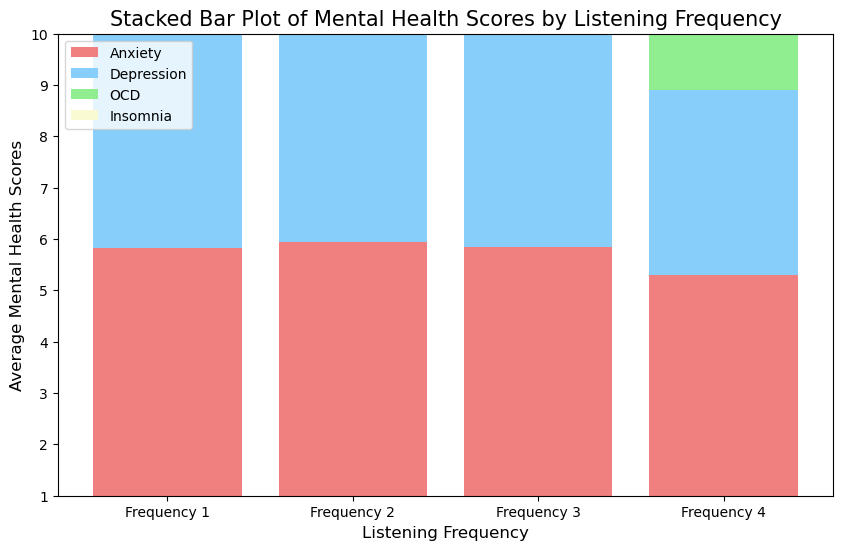

In [139]:
# Define average scores for each frequency category (1-4) for each genre
# Example with hypothetical average scores for Gospel (you can replace these with actual values)
ave_scores = {
    'Frequency 1': [ave_anxiety_gospel1, ave_dep_gospel1, ave_ocd_gospel1, ave_insom_gospel1],
    'Frequency 2': [ave_anxiety_gospel2, ave_dep_gospel2, ave_ocd_gospel2, ave_insom_gospel2],
    'Frequency 3': [ave_anxiety_gospel3, ave_dep_gospel3, ave_ocd_gospel3, ave_insom_gospel3],
    'Frequency 4': [ave_anxiety_gospel4, ave_dep_gospel4, ave_ocd_gospel4, ave_insom_gospel4]
}

# Convert to numpy array for easier stacking
data = np.array(list(ave_scores.values())).T  # Transpose to stack correctly

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Stack each category
ax.bar(ave_scores.keys(), data[0], label='Anxiety', color='lightcoral')
ax.bar(ave_scores.keys(), data[1], bottom=data[0], label='Depression', color='lightskyblue')
ax.bar(ave_scores.keys(), data[2], bottom=data[0] + data[1], label='OCD', color='lightgreen')
ax.bar(ave_scores.keys(), data[3], bottom=data[0] + data[1] + data[2], label='Insomnia', color='lightgoldenrodyellow')

# Add labels and title
ax.set_xlabel('Listening Frequency', fontsize=12)
ax.set_ylabel('Average Mental Health Scores', fontsize=12)
ax.set_title('Stacked Bar Plot of Mental Health Scores by Listening Frequency', fontsize=15)
ax.set_ylim(1, 10)  # Set y-axis range
ax.legend(loc='upper left')

# Display the plot
plt.show()


In [140]:
ave_insom_gospel4

3.5

In [141]:
#create a dataframe for these values
index = ["Classical", "Country", "EDM", "Folk", "Gospel", "Hip hop", "Jazz", "K pop", "Latin", "Lofi", 
         "Metal", "Pop", "R&B", "Rap", "Rock", "Video game music"]
columns = ["Anxiety", "Depression", "Insomnia", "OCD"]

mh_by_genre = pd.DataFrame(index=index, columns=columns)
mh_by_genre
#mh_by_genre.index = index
#mh_by_genre.columns = columns


#add values
average_anxiety = [ave_anxiety_classical4, ave_anxiety_country4, ave_anxiety_edm4,  ave_anxiety_folk4, ave_anxiety_gospel4, ave_anxiety_hiphop4, 
    ave_anxiety_jazz4, ave_anxiety_kpop4, ave_anxiety_latin4, ave_anxiety_lofi4, ave_anxiety_metal4, ave_anxiety_pop4, ave_anxiety_rnb4, 
    ave_anxiety_rap4, ave_anxiety_rock4, ave_anxiety_vgm4]

average_depression = [ave_dep_classical4, ave_dep_country4, ave_dep_edm4, ave_dep_folk4, ave_dep_gospel4, ave_dep_hiphop4, ave_dep_jazz4, 
        ave_dep_kpop4, ave_dep_latin4, ave_dep_lofi4, ave_dep_metal4, ave_dep_pop4, ave_dep_rnb4, ave_dep_rap4, ave_dep_rock4, ave_dep_vgm4]

average_ocd = [ave_ocd_classical4, ave_ocd_country4, ave_ocd_edm4, ave_ocd_folk4, ave_ocd_gospel4, ave_ocd_hiphop4, ave_ocd_jazz4, ave_ocd_kpop4, 
    ave_ocd_latin4, ave_ocd_lofi4, ave_ocd_metal4, ave_ocd_pop4, ave_ocd_rnb4, ave_ocd_rap4, ave_ocd_rock4, ave_ocd_vgm4]

average_insomnia = [ave_insom_classical4, ave_insom_country4, ave_insom_edm4, ave_insom_folk4, ave_insom_gospel4, ave_insom_hiphop4, ave_insom_jazz4, 
        ave_insom_kpop4, ave_insom_latin4, ave_insom_lofi4, ave_insom_metal4, ave_insom_pop4, ave_insom_rnb4, ave_insom_rap4, ave_insom_rock4, 
        ave_insom_vgm4]

mh_by_genre["Anxiety"] = average_anxiety
mh_by_genre["Depression"] = average_depression
mh_by_genre["Insomnia"] = average_insomnia
mh_by_genre["OCD"] = average_ocd



mh_by_genre

Anxiety  Depression  Insomnia       OCD
Classical         5.033898    4.745763  4.169492  2.186441
Country           5.621622    4.918919  3.378378  2.810811
EDM               5.750000    5.125000  4.265625  2.953125
Folk              5.983871    5.661290  4.322581  2.548387
Gospel            5.300000    3.600000  3.500000  2.700000
Hip hop           6.073529    5.102941  4.088235  3.029412
Jazz              6.114286    5.485714  4.542857  2.600000
K pop             6.205882    4.882353  4.029412  2.676471
Latin             7.187500    5.937500  4.062500  2.687500
Lofi              5.660000    5.380000  4.440000  2.300000
Metal             5.547170    5.122642  3.990566  2.462264
Pop               6.224242    5.272727  3.660606  2.709091
R&B               6.173913    5.260870  4.231884  3.028986
Rap               6.261538    5.292308  3.800000  2.830769
Rock              6.268085    5.425532  3.800000  2.655319
Video game music  6.378378    5.554054  4.202703  2.905405

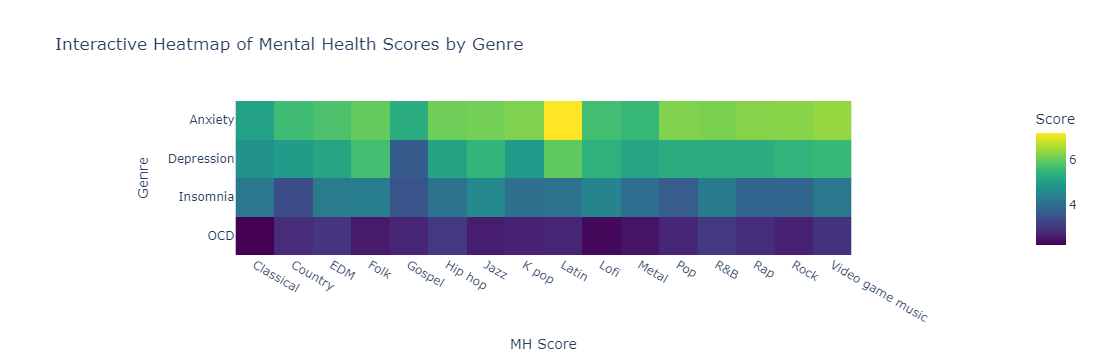

In [142]:
#HW6

#create an interactive heatmap
#transposing it because the plot looks super small without transposing it (gets squished own somehow)
fig = px.imshow(mh_by_genre.T, labels=dict(x="MH Score", y="Genre", color="Score"), color_continuous_scale="Viridis", 
    title="Interactive Heatmap of Mental Health Scores by Genre",)
# Show the heatmap
fig.show()



In [143]:
#now I'm curious which MH stat is the best to use to predict how a song will make someone feel. Which one has most variability so I can capture more effects?
#looks like Depression
mh_by_genre.describe()
#Yep, depression has the most variability (highest sd)

Anxiety  Depression   Insomnia        OCD
count  16.000000   16.000000  16.000000  16.000000
mean    5.986495    5.172976   4.030302   2.692749
std     0.502129    0.517690   0.328233   0.240497
min     5.033898    3.600000   3.378378   2.186441
25%     5.650405    5.056936   3.800000   2.587097
50%     6.093908    5.266798   4.075368   2.693750
75%     6.233566    5.440578   4.240319   2.849428
max     7.187500    5.937500   4.542857   3.029412

In [144]:
for i, val in enumerate(mh_by_genre["Depression"]):
    if val >= 5:
        mh_by_genre["Effect"] = 1
    else:
        mh_by_genre["Effect"] = 0

mh_by_genre

Anxiety  Depression  Insomnia       OCD  Effect
Classical         5.033898    4.745763  4.169492  2.186441       1
Country           5.621622    4.918919  3.378378  2.810811       1
EDM               5.750000    5.125000  4.265625  2.953125       1
Folk              5.983871    5.661290  4.322581  2.548387       1
Gospel            5.300000    3.600000  3.500000  2.700000       1
Hip hop           6.073529    5.102941  4.088235  3.029412       1
Jazz              6.114286    5.485714  4.542857  2.600000       1
K pop             6.205882    4.882353  4.029412  2.676471       1
Latin             7.187500    5.937500  4.062500  2.687500       1
Lofi              5.660000    5.380000  4.440000  2.300000       1
Metal             5.547170    5.122642  3.990566  2.462264       1
Pop               6.224242    5.272727  3.660606  2.709091       1
R&B               6.173913    5.260870  4.231884  3.028986       1
Rap               6.261538    5.292308  3.800000  2.830769       1
Rock              6.268085    5.425532  3.800000  2.655319       1
Video game music  6.378378    5.554054  4.202703  2.905405       1